In [1]:
import gzip
import json
import pandas as pd
import glob
from datetime import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; sns.set

<function seaborn.rcmod.set>

In [2]:
lst1='trust-201805231751.log.gz'


In [3]:
df1=pd.DataFrame()

In [5]:
    fname='trust-201805231751.log.gz'
    print(fname)
    with gzip.open(fname, 'rb') as f:
        lines = [x.decode('utf8').strip() for x in f.readlines()]
    lines[0]=lines[0].replace('[','')
    lines[0]=lines[0].replace(']','')
    lines[0]=lines[0].replace('}{"header"','},{"header"')
    lines1=lines[0].replace('}},','}}*').split('*')
    lst=[]
    for i in range(len(lines1)):
        lst.append(json.loads(lines1[i])['body'])
    df=pd.DataFrame(lst)    
    df=df[df['toc_id']=='21']
    df1=df1.append(df)

trust-201805231751.log.gz


In [6]:
df1.head()

actual_timestamp auto_expected canx_reason_code canx_timestamp canx_type  \
8     1527101460000          true              NaN            NaN       NaN   
9     1527101460000          true              NaN            NaN       NaN   
54    1527101400000          true              NaN            NaN       NaN   
59    1527101520000          true              NaN            NaN       NaN   
63    1527101400000          true              NaN            NaN       NaN   

   correction_ind creation_timestamp current_train_id d1266_record_number  \
8           false                NaN                                  NaN   
9           false                NaN                                  NaN   
54          false                NaN                                  NaN   
59          false                NaN                                  NaN   
63          false                NaN                                  NaN   

   delay_monitoring_point       ...        tp_origin_stanox  \
8                    true       ...                     NaN   
9                    true       ...                     NaN   
54                   true       ...                     NaN   
59                  false       ...                     NaN   
63                   true       ...                     NaN   

   tp_origin_timestamp train_call_mode train_call_type train_file_address  \
8                  NaN             NaN             NaN               None   
9                  NaN             NaN             NaN               None   
54                 NaN             NaN             NaN               None   
59                 NaN             NaN             NaN               None   
63                 NaN             NaN             NaN               None   

      train_id train_service_code train_terminated train_uid variation_status  
8   481P59MW23           21781002            false       NaN            EARLY  
9   521N54MX23           25939001            false       NaN            EARLY  
54  501F67MX23           21939001            false       NaN            EARLY  
59  521H86MW23           25913000            false       NaN             LATE  
63  472H57MX23           21913000            false       NaN            EARLY  

[5 rows x 49 columns]

In [ ]:
df1.to_csv('processed trust data.csv',index=None)

In [ ]:
df1=pd.read_csv('processed trust data.csv')

In [182]:
len(df1)

184235

In [7]:
df1=df1[['event_type','gbtt_timestamp','original_loc_stanox','planned_timestamp','timetable_variation','original_loc_timestamp','current_train_id','delay_monitoring_point','next_report_run_time','reporting_stanox','actual_timestamp','correction_ind','event_source','train_file_address','platform','division_code','train_terminated','train_id','offroute_ind','variation_status','train_service_code','toc_id','loc_stanox','auto_expected','direction_ind','route','planned_event_type','next_report_stanox','line_ind']]

In [8]:
df1.head()

event_type gbtt_timestamp original_loc_stanox planned_timestamp  \
8     ARRIVAL  1527101520000                         1527101520000   
9   DEPARTURE                                        1527101520000   
54  DEPARTURE  1527101460000                         1527101460000   
59    ARRIVAL                                        1527101250000   
63  DEPARTURE  1527101460000                         1527101460000   

   timetable_variation original_loc_timestamp current_train_id  \
8                    1                                           
9                    1                                           
54                   1                                           
59                   5                                           
63                   1                                           

   delay_monitoring_point next_report_run_time reporting_stanox   ...     \
8                    true                    2            49302   ...      
9                    true                    2            52739   ...      
54                   true                    3            50211   ...      
59                  false                    1            00000   ...      
63                   true                    3            47221   ...      

   variation_status train_service_code toc_id loc_stanox auto_expected  \
8             EARLY           21781002     21      49302          true   
9             EARLY           25939001     21      52739          true   
54            EARLY           21939001     21      50211          true   
59             LATE           25913000     21      47342          true   
63            EARLY           21913000     21      47221          true   

   direction_ind route planned_event_type next_report_stanox line_ind  
8             UP     0            ARRIVAL              50049           
9           DOWN     2          DEPARTURE              52701        M  
54            UP     2          DEPARTURE              50217           
59                   0            ARRIVAL              47339           
63            UP     2          DEPARTURE              47250           

[5 rows x 29 columns]

In [9]:
# STANOX, CRS DATAFRAME 
crs_stanox_loc_df = pd.read_excel('Network Rail Analysis/Data.xlsx', sheetname='CRS',converters={'STANOX':str})
crs_stanox_loc_df.head()

OBJECTID CRS Code                   NAME  EASTING  NORTHING  SOURCE  \
0         1      AAP       ALEXANDRA PALACE   530281    190469   OTHER   
1         2      AAT               ACHANALT   226034    861472   OTHER   
2         3      ABA  Aberdare Rail Station   300400    202800  NAPTAN   
3         4      ABC             ALTNABREAC   300360    945696   OTHER   
4         5      ABD               ABERDEEN   394210    805692   OTHER   

    TIPLOC STANOX    Region  
0  ALEXNDP  54103    London  
1  ACHANLT  01081  Scotland  
2   ABDARE  78100     Wales  
3  ALTNBRC  01010  Scotland  
4  ABRDEEN  02071  Scotland

In [10]:
# STANOX, Non-CRS DATAFRAME 
noncrs_stanox_loc_df = pd.read_excel('Network Rail Analysis/Data.xlsx', sheetname='Non_CRS_Locations',converters={'STANOX':str})
noncrs_stanox_loc_df.head()

OBJECTID  CRS                        NAME  EASTING  NORTHING SOURCE  \
0         1  NaN            CRAIGINCHES C.E.   394614    804153  OTHER   
1         2  NaN      CRAIGENTINNY SIG EP860   329050    674237  OTHER   
2         3  NaN   CRICKLEWOOD DEPOT EXIT RD   523936    185984  OTHER   
3         4  NaN  CRICKLEWOOD RDP SHUNT NECK   522931    187116  OTHER   
4         5  NaN              CROSS KEYS JCN   321917    192151  OTHER   

    TIPLOC STANOX  
0  CRGICCE  02116  
1  CRGN860  04517  
2  CRKLDER  63403  
3  CRKLSHN  63414  
4  CRSKYJN  76633

In [11]:
crs_stanox_loc_df=crs_stanox_loc_df[['NAME','EASTING','NORTHING','TIPLOC','STANOX']]
noncrs_stanox_loc_df=noncrs_stanox_loc_df[['NAME','EASTING','NORTHING','TIPLOC','STANOX']]

In [12]:
stanox_loc_df=crs_stanox_loc_df.append(noncrs_stanox_loc_df)
stanox_loc_df=stanox_loc_df.drop_duplicates()

In [13]:
stanox_loc_df.head()

NAME  EASTING  NORTHING   TIPLOC STANOX
0       ALEXANDRA PALACE   530281    190469  ALEXNDP  54103
1               ACHANALT   226034    861472  ACHANLT  01081
2  Aberdare Rail Station   300400    202800   ABDARE  78100
3             ALTNABREAC   300360    945696  ALTNBRC  01010
4               ABERDEEN   394210    805692  ABRDEEN  02071

In [14]:
df1['variation_status'].value_counts()

LATE         20
EARLY         7
ON TIME       5
OFF ROUTE     2
Name: variation_status, dtype: int64

In [15]:
df1_with_locs=pd.merge(df1,stanox_loc_df,left_on='loc_stanox',right_on='STANOX',how='left')

In [16]:
df1_with_locs.head()

event_type gbtt_timestamp original_loc_stanox planned_timestamp  \
0    ARRIVAL  1527101520000                         1527101520000   
1  DEPARTURE                                        1527101520000   
2  DEPARTURE  1527101460000                         1527101460000   
3    ARRIVAL                                        1527101250000   
4    ARRIVAL                                        1527101250000   

  timetable_variation original_loc_timestamp current_train_id  \
0                   1                                           
1                   1                                           
2                   1                                           
3                   5                                           
4                   5                                           

  delay_monitoring_point next_report_run_time reporting_stanox  ...    \
0                   true                    2            49302  ...     
1                   true                    2            52739  ...     
2                   true                    3            50211  ...     
3                  false                    1            00000  ...     
4                  false                    1            00000  ...     

  direction_ind route planned_event_type next_report_stanox line_ind  \
0            UP     0            ARRIVAL              50049            
1          DOWN     2          DEPARTURE              52701        M   
2            UP     2          DEPARTURE              50217            
3                   0            ARRIVAL              47339            
4                   0            ARRIVAL              47339            

                    NAME EASTING NORTHING   TIPLOC STANOX  
0            MANNINGTREE  609409   232240  MANNGTR  49302  
1          BETHNAL GREEN  534697   182336  BTHNLGR  52739  
2                 WITHAM  582062   215205  WITHAME  50211  
3               STANSTED  551395   224802  STANSTD  47342  
4  STANSTED MOUNTFITCHET  551395   224802  STANMFC  47342  

[5 rows x 34 columns]

In [17]:
df1_with_locs['actual_ts']=pd.to_datetime(df1_with_locs['actual_timestamp'], unit='ms')

In [18]:
df1_with_locs['STANOX']=df1_with_locs['STANOX'].fillna('')

In [19]:
df1_with_locs['gbtt_timestamp']=pd.to_datetime(df1_with_locs['gbtt_timestamp'], unit='ms')
df1_with_locs['planned_timestamp']=pd.to_datetime(df1_with_locs['planned_timestamp'], unit='ms')
df1_with_locs['actual_timestamp']=pd.to_datetime(df1_with_locs['actual_timestamp'], unit='ms')
df1_with_locs['original_loc_timestamp']=pd.to_datetime(df1_with_locs['original_loc_timestamp'], unit='ms')
df1_with_locs.head()


event_type      gbtt_timestamp original_loc_stanox   planned_timestamp  \
0    ARRIVAL 2018-05-23 18:52:00                     2018-05-23 18:52:00   
1  DEPARTURE                 NaT                     2018-05-23 18:52:00   
2  DEPARTURE 2018-05-23 18:51:00                     2018-05-23 18:51:00   
3    ARRIVAL                 NaT                     2018-05-23 18:47:30   
4    ARRIVAL                 NaT                     2018-05-23 18:47:30   

  timetable_variation original_loc_timestamp current_train_id  \
0                   1                    NaT                    
1                   1                    NaT                    
2                   1                    NaT                    
3                   5                    NaT                    
4                   5                    NaT                    

  delay_monitoring_point next_report_run_time reporting_stanox  \
0                   true                    2            49302   
1                   true                    2            52739   
2                   true                    3            50211   
3                  false                    1            00000   
4                  false                    1            00000   

          ...         route planned_event_type next_report_stanox line_ind  \
0         ...             0            ARRIVAL              50049            
1         ...             2          DEPARTURE              52701        M   
2         ...             2          DEPARTURE              50217            
3         ...             0            ARRIVAL              47339            
4         ...             0            ARRIVAL              47339            

                    NAME EASTING NORTHING   TIPLOC STANOX           actual_ts  
0            MANNINGTREE  609409   232240  MANNGTR  49302 2018-05-23 18:51:00  
1          BETHNAL GREEN  534697   182336  BTHNLGR  52739 2018-05-23 18:51:00  
2                 WITHAM  582062   215205  WITHAME  50211 2018-05-23 18:50:00  
3               STANSTED  551395   224802  STANSTD  47342 2018-05-23 18:52:00  
4  STANSTED MOUNTFITCHET  551395   224802  STANMFC  47342 2018-05-23 18:52:00  

[5 rows x 35 columns]

In [20]:
df1_with_locs['actual_timestamp']=df1_with_locs['actual_timestamp'].fillna('')
df1_with_locs['gbtt_timestamp']=df1_with_locs['gbtt_timestamp'].fillna('')
df1_with_locs['planned_timestamp']=df1_with_locs['planned_timestamp'].fillna('')
df1_with_locs['actual_timestamp']=df1_with_locs['actual_timestamp'].fillna('')
df1_with_locs['original_loc_timestamp']=df1_with_locs['original_loc_timestamp'].fillna('')


In [21]:
df1_with_locs=df1_with_locs[df1_with_locs['actual_timestamp']!='']

In [22]:
df1_with_locs.head()

event_type       gbtt_timestamp original_loc_stanox    planned_timestamp  \
0    ARRIVAL  2018-05-23 18:52:00                      2018-05-23 18:52:00   
1  DEPARTURE                                           2018-05-23 18:52:00   
2  DEPARTURE  2018-05-23 18:51:00                      2018-05-23 18:51:00   
3    ARRIVAL                                           2018-05-23 18:47:30   
4    ARRIVAL                                           2018-05-23 18:47:30   

  timetable_variation original_loc_timestamp current_train_id  \
0                   1                                           
1                   1                                           
2                   1                                           
3                   5                                           
4                   5                                           

  delay_monitoring_point next_report_run_time reporting_stanox  \
0                   true                    2            49302   
1                   true                    2            52739   
2                   true                    3            50211   
3                  false                    1            00000   
4                  false                    1            00000   

          ...         route planned_event_type next_report_stanox line_ind  \
0         ...             0            ARRIVAL              50049            
1         ...             2          DEPARTURE              52701        M   
2         ...             2          DEPARTURE              50217            
3         ...             0            ARRIVAL              47339            
4         ...             0            ARRIVAL              47339            

                    NAME EASTING NORTHING   TIPLOC STANOX           actual_ts  
0            MANNINGTREE  609409   232240  MANNGTR  49302 2018-05-23 18:51:00  
1          BETHNAL GREEN  534697   182336  BTHNLGR  52739 2018-05-23 18:51:00  
2                 WITHAM  582062   215205  WITHAME  50211 2018-05-23 18:50:00  
3               STANSTED  551395   224802  STANSTD  47342 2018-05-23 18:52:00  
4  STANSTED MOUNTFITCHET  551395   224802  STANMFC  47342 2018-05-23 18:52:00  

[5 rows x 35 columns]

In [23]:
df1_with_locs['actual_date'] = df1_with_locs['actual_ts'].dt.date
df1_with_locs['actual_hour'] = df1_with_locs['actual_ts'].dt.hour


In [24]:
df1_with_locs=df1_with_locs[(df1_with_locs['actual_ts'] < datetime(2018,5,31))]

In [31]:
df2=df1_with_locs[['variation_status','actual_hour','actual_timestamp','route','direction_ind','NAME','EASTING','NORTHING']]
#df2=df2[df2['route']=='1']
#df2=df2[df2['direction_ind']=='UP']

In [49]:
df1_with_locs.head()

event_type       gbtt_timestamp original_loc_stanox    planned_timestamp  \
0    ARRIVAL  2018-05-23 18:52:00                      2018-05-23 18:52:00   
1  DEPARTURE                                           2018-05-23 18:52:00   
2  DEPARTURE  2018-05-23 18:51:00                      2018-05-23 18:51:00   
3    ARRIVAL                                           2018-05-23 18:47:30   
4    ARRIVAL                                           2018-05-23 18:47:30   

  timetable_variation original_loc_timestamp current_train_id  \
0                   1                                           
1                   1                                           
2                   1                                           
3                   5                                           
4                   5                                           

  delay_monitoring_point next_report_run_time reporting_stanox     ...      \
0                   true                    2            49302     ...       
1                   true                    2            52739     ...       
2                   true                    3            50211     ...       
3                  false                    1            00000     ...       
4                  false                    1            00000     ...       

  next_report_stanox line_ind                   NAME EASTING NORTHING  \
0              50049                     MANNINGTREE  609409   232240   
1              52701        M          BETHNAL GREEN  534697   182336   
2              50217                          WITHAM  582062   215205   
3              47339                        STANSTED  551395   224802   
4              47339           STANSTED MOUNTFITCHET  551395   224802   

    TIPLOC STANOX           actual_ts actual_date actual_hour  
0  MANNGTR  49302 2018-05-23 18:51:00  2018-05-23          18  
1  BTHNLGR  52739 2018-05-23 18:51:00  2018-05-23          18  
2  WITHAME  50211 2018-05-23 18:50:00  2018-05-23          18  
3  STANSTD  47342 2018-05-23 18:52:00  2018-05-23          18  
4  STANMFC  47342 2018-05-23 18:52:00  2018-05-23          18  

[5 rows x 37 columns]

In [50]:
df1.head()

event_type gbtt_timestamp original_loc_stanox planned_timestamp  \
8     ARRIVAL  1527101520000                         1527101520000   
9   DEPARTURE                                        1527101520000   
54  DEPARTURE  1527101460000                         1527101460000   
59    ARRIVAL                                        1527101250000   
63  DEPARTURE  1527101460000                         1527101460000   

   timetable_variation original_loc_timestamp current_train_id  \
8                    1                                           
9                    1                                           
54                   1                                           
59                   5                                           
63                   1                                           

   delay_monitoring_point next_report_run_time reporting_stanox   ...     \
8                    true                    2            49302   ...      
9                    true                    2            52739   ...      
54                   true                    3            50211   ...      
59                  false                    1            00000   ...      
63                   true                    3            47221   ...      

   variation_status train_service_code toc_id loc_stanox auto_expected  \
8             EARLY           21781002     21      49302          true   
9             EARLY           25939001     21      52739          true   
54            EARLY           21939001     21      50211          true   
59             LATE           25913000     21      47342          true   
63            EARLY           21913000     21      47221          true   

   direction_ind route planned_event_type next_report_stanox line_ind  
8             UP     0            ARRIVAL              50049           
9           DOWN     2          DEPARTURE              52701        M  
54            UP     2          DEPARTURE              50217           
59                   0            ARRIVAL              47339           
63            UP     2          DEPARTURE              47250           

[5 rows x 29 columns]

In [51]:
df1.to_csv('original trust data.csv',index=None)

In [52]:
df1_with_locs.to_csv('original trust data with stanox details.csv',index=None)

In [53]:
df2.head()

variation_status  actual_hour    actual_timestamp route direction_ind  \
0            EARLY           18 2018-05-23 18:51:00     0            UP   
1            EARLY           18 2018-05-23 18:51:00     2          DOWN   
2            EARLY           18 2018-05-23 18:50:00     2            UP   
3             LATE           18 2018-05-23 18:52:00     0                 
4             LATE           18 2018-05-23 18:52:00     0                 

                    NAME  EASTING  NORTHING  
0            MANNINGTREE   609409    232240  
1          BETHNAL GREEN   534697    182336  
2                 WITHAM   582062    215205  
3               STANSTED   551395    224802  
4  STANSTED MOUNTFITCHET   551395    224802

In [54]:
df3=df2.groupby(['variation_status','actual_hour','EASTING','NORTHING','NAME','route','direction_ind'])['actual_timestamp'].count().reset_index()

In [55]:
df3.head()

variation_status  actual_hour  EASTING  NORTHING                     NAME  \
0            EARLY           18   534697    182336            BETHNAL GREEN   
1            EARLY           18   546252    257418                CAMBRIDGE   
2            EARLY           18   546252    257418          CAMBRIDGE NORTH   
3            EARLY           18   552828    225361  STANSTED NORTH JUNCTION   
4            EARLY           18   561350    194999                SHENFIELD   

  route direction_ind  actual_timestamp  
0     2          DOWN                 1  
1     2            UP                 1  
2     2            UP                 1  
3     1            UP                 1  
4     0            UP                 1

In [56]:
df3['actual_timestamp']=df3['actual_timestamp'].fillna(0)

In [57]:
df3.columns

Index(['variation_status', 'actual_hour', 'EASTING', 'NORTHING', 'NAME',
       'route', 'direction_ind', 'actual_timestamp'],
      dtype='object')

In [58]:
df3.columns=['variation_status', 'actual_hour', 'EASTING', 'NORTHING', 'NAME','route', 'direction_ind','Count of variation in a given hour by variation type']

In [59]:
df3.head()

variation_status  actual_hour  EASTING  NORTHING                     NAME  \
0            EARLY           18   534697    182336            BETHNAL GREEN   
1            EARLY           18   546252    257418                CAMBRIDGE   
2            EARLY           18   546252    257418          CAMBRIDGE NORTH   
3            EARLY           18   552828    225361  STANSTED NORTH JUNCTION   
4            EARLY           18   561350    194999                SHENFIELD   

  route direction_ind  Count of variation in a given hour by variation type  
0     2          DOWN                                                  1     
1     2            UP                                                  1     
2     2            UP                                                  1     
3     1            UP                                                  1     
4     0            UP                                                  1

In [48]:
df3.to_csv('counts_anglia.csv',index=None)

In [ ]:
df_count=df3

In [61]:
df_vis = df3.pivot(index='variation_status', columns='actual_hour', values='Count of variation in a given hour by variation type')


ValueError: Index contains duplicate entries, cannot reshape

In [483]:
df_vis.head()

actual_hour         0     1    2     4      5      6      7      8      9   \
variation_status                                                             
EARLY             62.0   4.0  1.0  20.0  154.0  216.0  229.0  241.0  185.0   
LATE              55.0  14.0  NaN  14.0  112.0  284.0  322.0  322.0  341.0   
ON TIME           56.0   2.0  NaN  33.0  200.0  391.0  471.0  416.0  366.0   

actual_hour          10  ...       14     15     16     17     18     19  \
variation_status         ...                                               
EARLY             168.0  ...    161.0  147.0  178.0  166.0  145.0  207.0   
LATE              356.0  ...    307.0  377.0  395.0  361.0  401.0  366.0   
ON TIME           319.0  ...    360.0  307.0  339.0  382.0  374.0  347.0   

actual_hour          20     21     22     23  
variation_status                              
EARLY             218.0  175.0  172.0  173.0  
LATE              293.0  326.0  242.0  192.0  
ON TIME           352.0  352.0  315.0  273.0  

[3 rows x 23 columns]

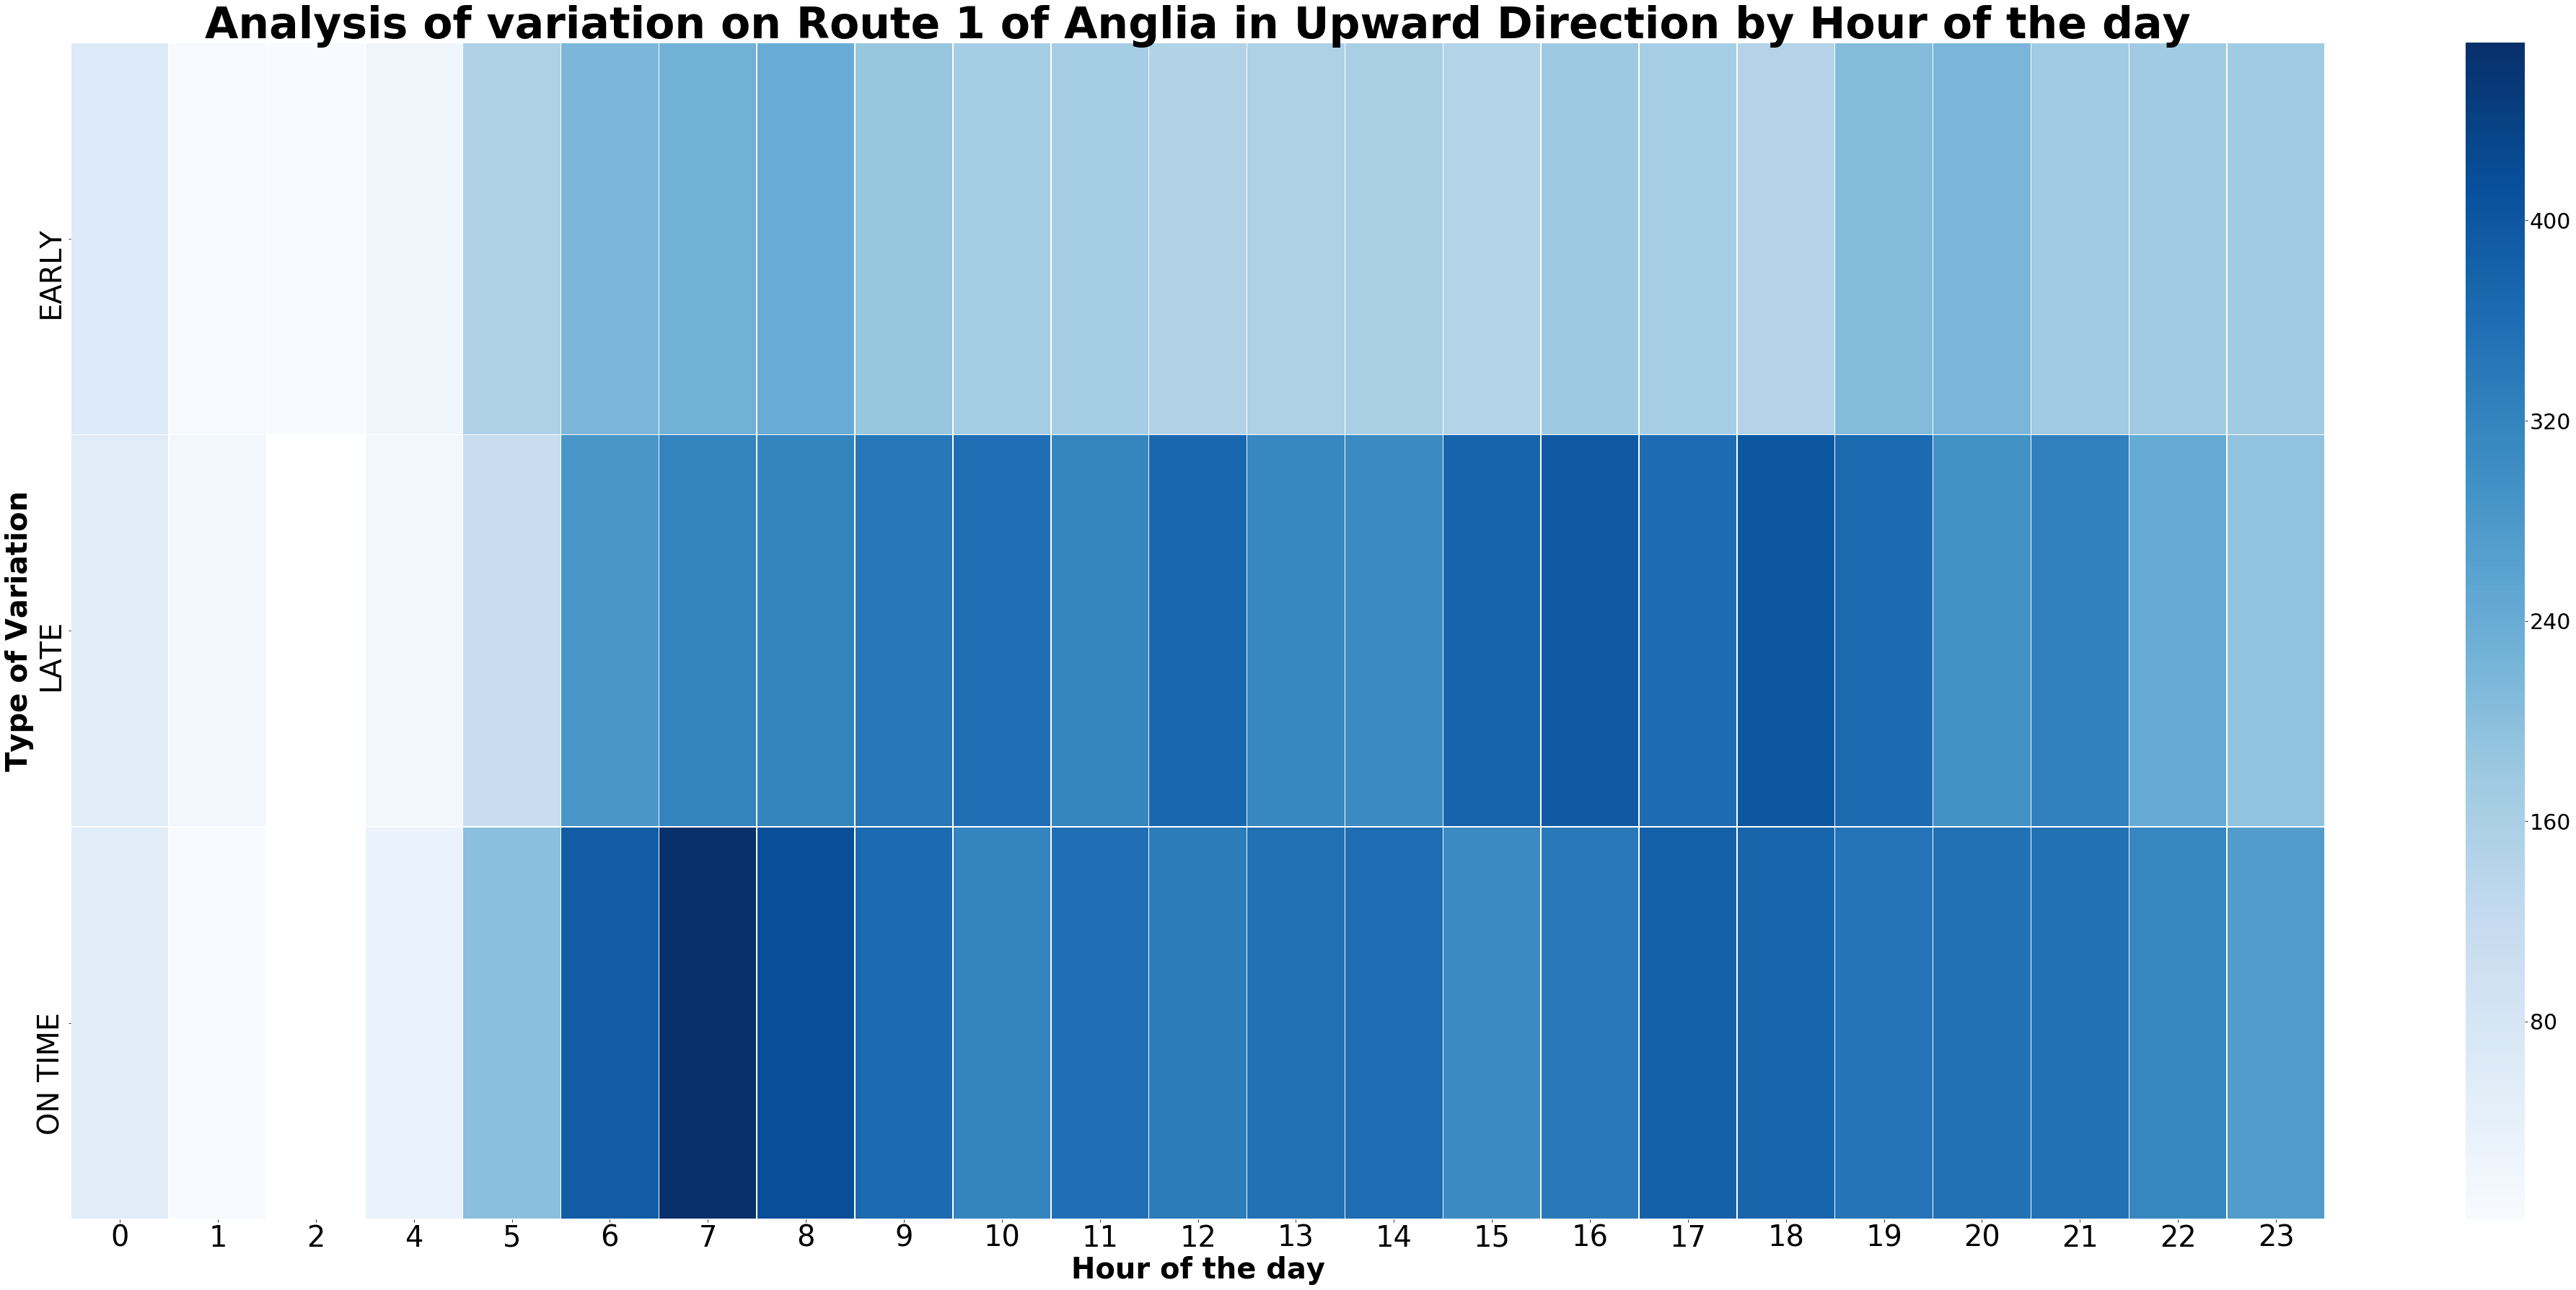

In [485]:
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='Blues', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Type of Variation', fontsize=40,fontweight="bold")
ax.set_xlabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_title('Analysis of variation on Route 1 of Anglia in Upward Direction by Hour of the day', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
plt.yticks()
plt.show()
fig.savefig('heatmap_for_type_of_variation_per_hour_route_1_upward.png')

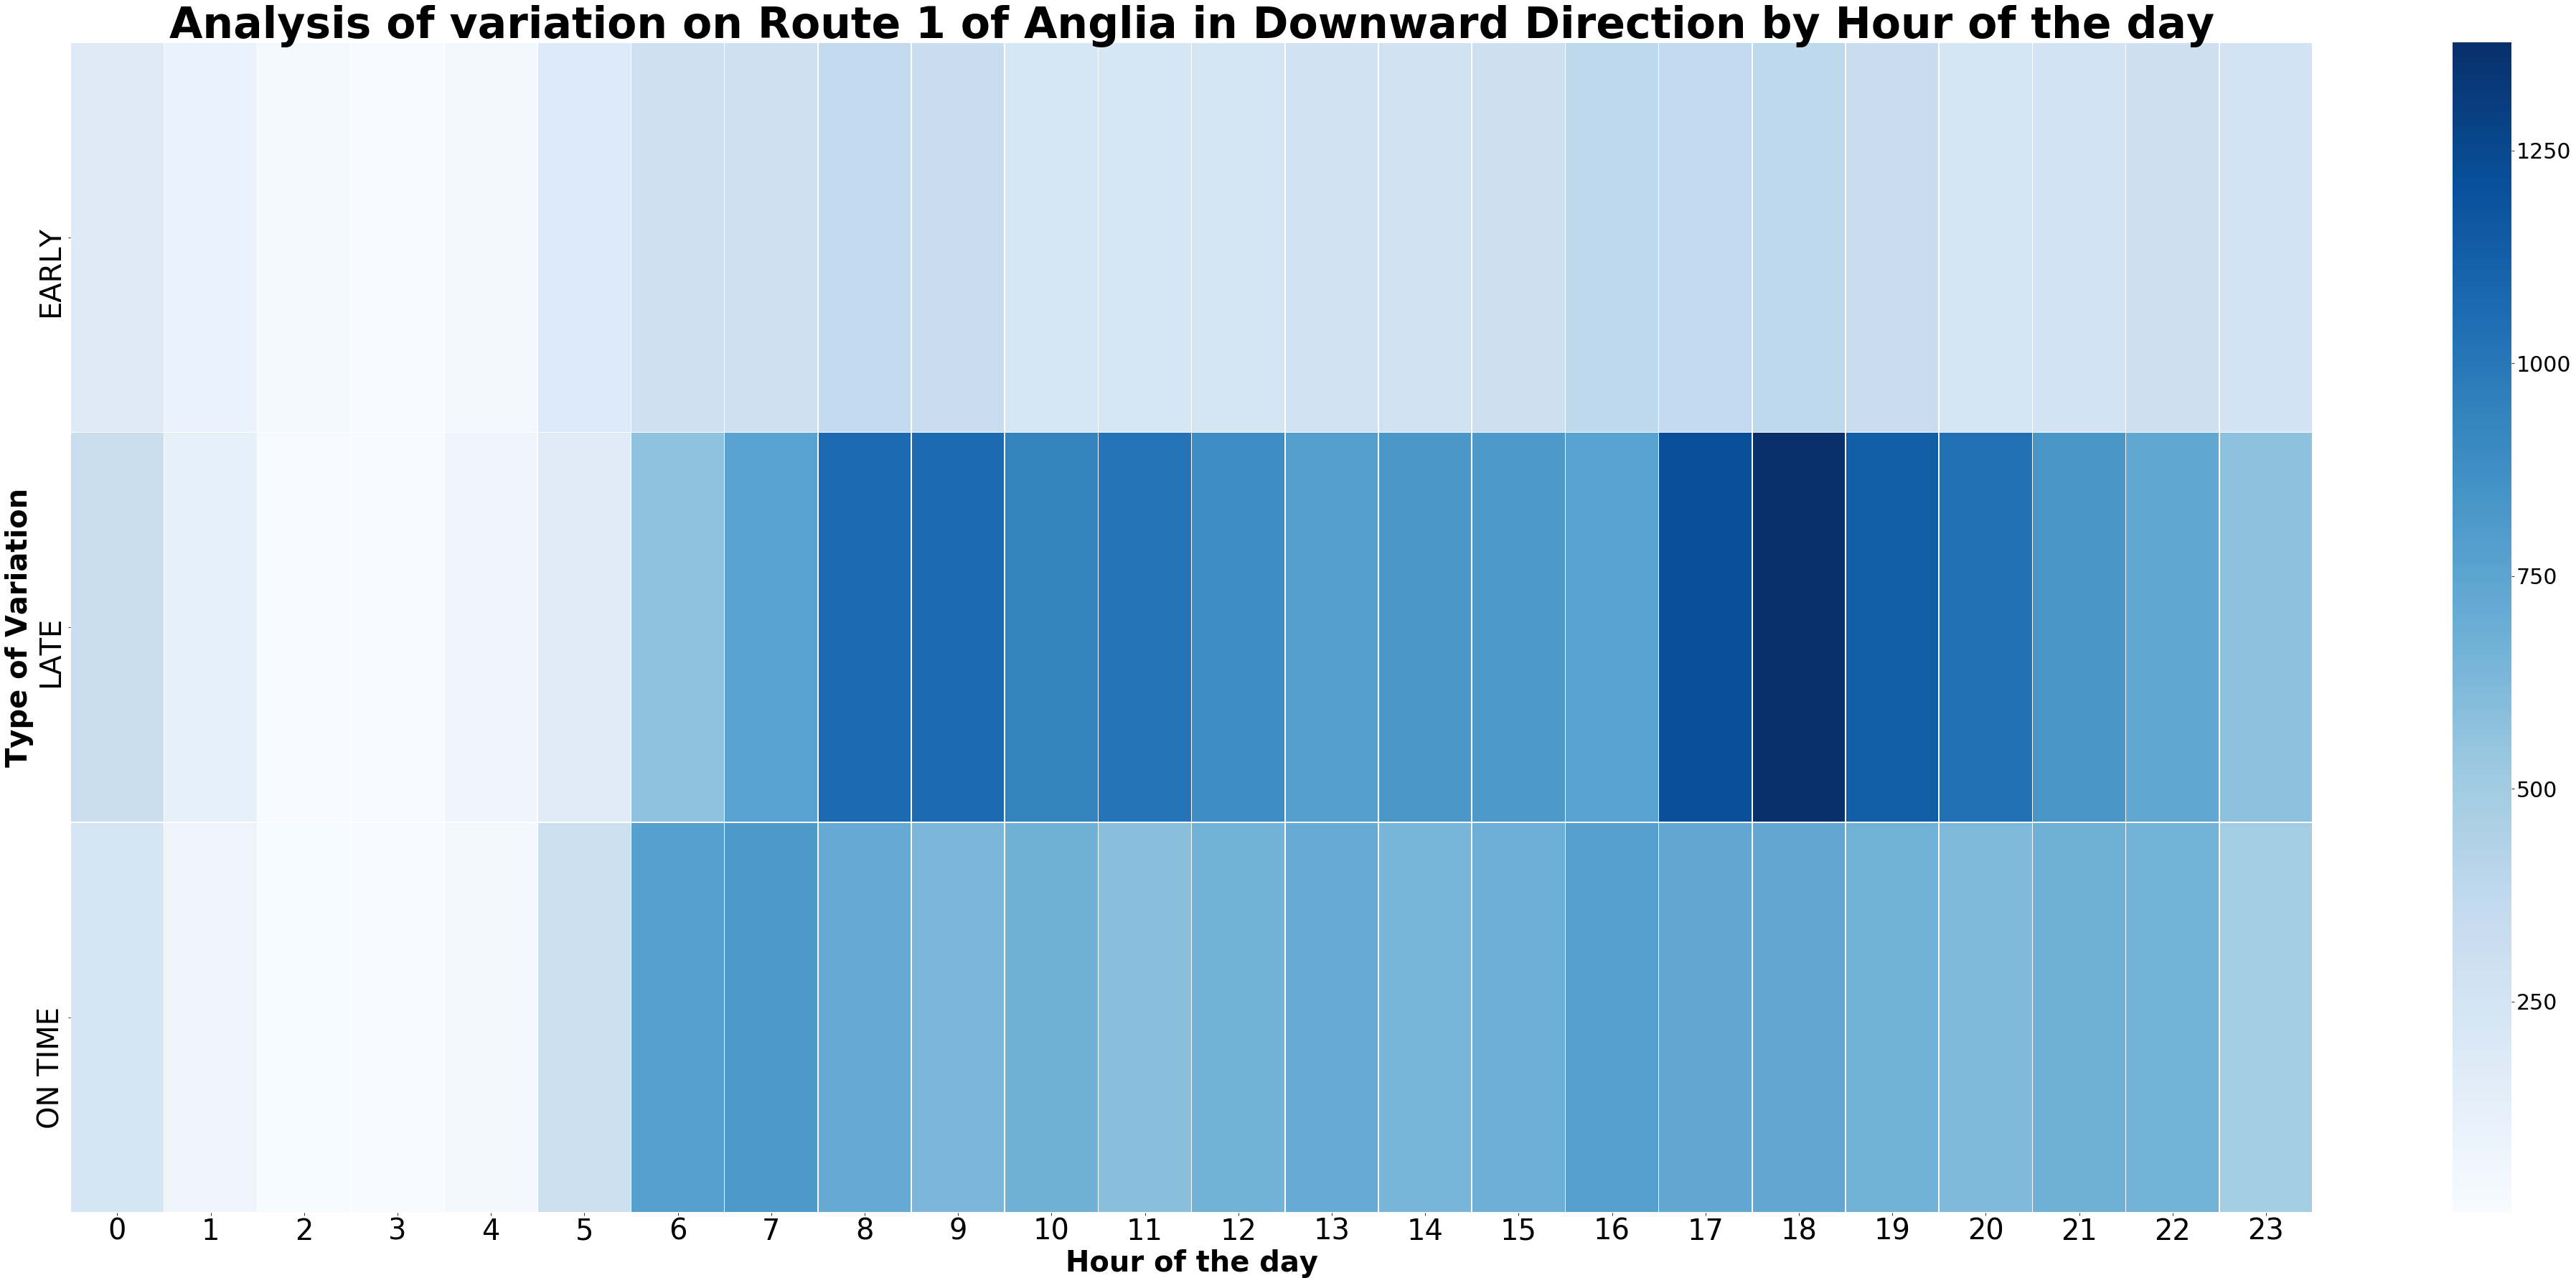

In [487]:
df2=df1_with_locs[['variation_status','actual_hour','actual_timestamp','route','direction_ind']]
df2=df2[df2['route']=='1']
df2=df2[df2['direction_ind']=='DOWN']
df3=df2.groupby(['variation_status','actual_hour'])['actual_timestamp'].count().reset_index()
df3['actual_timestamp']=df3['actual_timestamp'].fillna(0)
df_vis = df3.pivot(index='variation_status', columns='actual_hour', values='actual_timestamp')
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='Blues', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Type of Variation', fontsize=40,fontweight="bold")
ax.set_xlabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_title('Analysis of variation on Route 1 of Anglia in Downward Direction by Hour of the day', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
plt.yticks()
plt.show()
fig.savefig('heatmap_for_type_of_variation_per_hour_route_1_Downward.png')

In [486]:
df1_with_locs.NAME=df1_with_locs.NAME.str.title()

In [62]:
df2=df1_with_locs[['NAME','variation_status','actual_ts','actual_hour']]

In [63]:
df2.head()

NAME variation_status           actual_ts  actual_hour
0            MANNINGTREE            EARLY 2018-05-23 18:51:00           18
1          BETHNAL GREEN            EARLY 2018-05-23 18:51:00           18
2                 WITHAM            EARLY 2018-05-23 18:50:00           18
3               STANSTED             LATE 2018-05-23 18:52:00           18
4  STANSTED MOUNTFITCHET             LATE 2018-05-23 18:52:00           18

In [64]:
df3=df2.groupby(['NAME','variation_status','actual_hour'])['actual_ts'].count().reset_index()

In [65]:
df3.head()

NAME variation_status  actual_hour  actual_ts
0    BETHNAL GREEN            EARLY           18          1
1    BROXBOURNE JN          ON TIME           18          1
2         BRUNDALL             LATE           18          2
3        CAMBRIDGE            EARLY           18          1
4  CAMBRIDGE NORTH            EARLY           18          1

In [66]:
df3['actual_ts']=df3['actual_ts'].fillna(0)

In [67]:
df3['variation_status'].unique()

array(['EARLY', 'ON TIME', 'LATE', 'OFF ROUTE'], dtype=object)

In [68]:
df_early=df3[df3['variation_status']=='EARLY']
df_late=df3[df3['variation_status']=='LATE']
df_ontime=df3[df3['variation_status']=='ON TIME']
df_offroute=df3[df3['variation_status']=='OFF ROUTE']

In [69]:
df_early.head()

NAME variation_status  actual_hour  actual_ts
0           BETHNAL GREEN            EARLY           18          1
3               CAMBRIDGE            EARLY           18          1
4         CAMBRIDGE NORTH            EARLY           18          1
14            MANNINGTREE            EARLY           18          1
15  MOUNTNESSING JUNCTION            EARLY           18          1

In [70]:
df_vis = df_late.pivot(index='NAME', columns='actual_hour', values='actual_ts')

In [71]:
fig, ax = plt.subplots(figsize=(170,130))
sns.heatmap(df_vis, fmt="g", cmap='Greens', linewidths=.5,annot=True,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Type of Variation', fontsize=40,fontweight="bold")
ax.set_xlabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_title('Analysis of early arrival/departures on Anglia route by Hour of the day', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
plt.yticks()
plt.show()
#fig.savefig('heatmap_for_early_journeys_per_hour_with_annotation.png')

In [72]:
df3=df2.groupby(['NAME','variation_status'])['actual_ts'].count().reset_index()

In [73]:
df3['actual_ts']=df3['actual_ts'].fillna(0)

In [74]:
df_early=df3[df3['variation_status']=='EARLY']
df_late=df3[df3['variation_status']=='LATE']
df_ontime=df3[df3['variation_status']=='ON TIME']
df_offroute=df3[df3['variation_status']=='OFF ROUTE']

In [75]:
df3.head()

NAME variation_status  actual_ts
0    BETHNAL GREEN            EARLY          1
1    BROXBOURNE JN          ON TIME          1
2         BRUNDALL             LATE          2
3        CAMBRIDGE            EARLY          1
4  CAMBRIDGE NORTH            EARLY          1

In [76]:
df_vis = df3.pivot(index='variation_status', columns='NAME', values='actual_ts')

In [77]:
df1_with_locs.columns

Index(['event_type', 'gbtt_timestamp', 'original_loc_stanox',
       'planned_timestamp', 'timetable_variation', 'original_loc_timestamp',
       'current_train_id', 'delay_monitoring_point', 'next_report_run_time',
       'reporting_stanox', 'actual_timestamp', 'correction_ind',
       'event_source', 'train_file_address', 'platform', 'division_code',
       'train_terminated', 'train_id', 'offroute_ind', 'variation_status',
       'train_service_code', 'toc_id', 'loc_stanox', 'auto_expected',
       'direction_ind', 'route', 'planned_event_type', 'next_report_stanox',
       'line_ind', 'NAME', 'EASTING', 'NORTHING', 'TIPLOC', 'STANOX',
       'actual_ts', 'actual_date', 'actual_hour'],
      dtype='object')

In [78]:
df2=df1_with_locs[['NAME','variation_status','actual_ts','actual_date','actual_hour','route','direction_ind']]

In [79]:
df2.head()

NAME variation_status           actual_ts actual_date  \
0            MANNINGTREE            EARLY 2018-05-23 18:51:00  2018-05-23   
1          BETHNAL GREEN            EARLY 2018-05-23 18:51:00  2018-05-23   
2                 WITHAM            EARLY 2018-05-23 18:50:00  2018-05-23   
3               STANSTED             LATE 2018-05-23 18:52:00  2018-05-23   
4  STANSTED MOUNTFITCHET             LATE 2018-05-23 18:52:00  2018-05-23   

   actual_hour route direction_ind  
0           18     0            UP  
1           18     2          DOWN  
2           18     2            UP  
3           18     0                
4           18     0

In [80]:
df2['route'].unique()

array(['0', '2', '1', '', '3'], dtype=object)

In [81]:
df2=df2[df2['route']=='1']

In [82]:
df2=df2[df2['direction_ind']=='UP']

In [83]:
df2=df2.sort_values('actual_ts')

In [84]:
df3=df2[df2['variation_status']=='LATE']

In [85]:
df3.head()

Empty DataFrame
Columns: [NAME, variation_status, actual_ts, actual_date, actual_hour, route, direction_ind]
Index: []

In [442]:
df3['NAME']=df3['NAME'].fillna('')

/Users/akshat.kaushik/anaconda_folder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [443]:
df3.head()

NAME variation_status           actual_ts  \
144371              Prittlewell             LATE 2018-05-24 04:04:00   
44282                                       LATE 2018-05-24 04:07:00   
93104                  Rochford             LATE 2018-05-24 04:09:00   
87282       Manor Park Junction             LATE 2018-05-24 04:56:00   
87281   Manor Park Sig 350/5083             LATE 2018-05-24 04:56:00   

       actual_date  actual_hour route direction_ind  
144371  2018-05-24            4     1            UP  
44282   2018-05-24            4     1            UP  
93104   2018-05-24            4     1            UP  
87282   2018-05-24            4     1            UP  
87281   2018-05-24            4     1            UP

In [444]:
df3=df3[df3['NAME']!='']

In [445]:
df3.head()

NAME variation_status           actual_ts  \
144371              Prittlewell             LATE 2018-05-24 04:04:00   
93104                  Rochford             LATE 2018-05-24 04:09:00   
87282       Manor Park Junction             LATE 2018-05-24 04:56:00   
87281   Manor Park Sig 350/5083             LATE 2018-05-24 04:56:00   
87280                Manor Park             LATE 2018-05-24 04:56:00   

       actual_date  actual_hour route direction_ind  
144371  2018-05-24            4     1            UP  
93104   2018-05-24            4     1            UP  
87282   2018-05-24            4     1            UP  
87281   2018-05-24            4     1            UP  
87280   2018-05-24            4     1            UP

In [446]:
df3['actual_date'].unique()

array([datetime.date(2018, 5, 24), datetime.date(2018, 5, 25),
       datetime.date(2018, 5, 26), datetime.date(2018, 5, 27),
       datetime.date(2018, 5, 28), datetime.date(2018, 5, 29),
       datetime.date(2018, 5, 30)], dtype=object)

In [447]:
df4=df3.groupby(['NAME','actual_hour'])['actual_ts'].count().reset_index()

In [448]:
df4.head()

NAME  actual_hour  actual_ts
0  Alresford (Essex)            6          3
1  Alresford (Essex)            7          8
2  Alresford (Essex)            8          6
3  Alresford (Essex)            9          5
4  Alresford (Essex)           10          4

In [449]:
df4=df4.drop_duplicates()

In [450]:
df_vis = df4.pivot(index='actual_hour', columns='NAME', values='actual_ts')

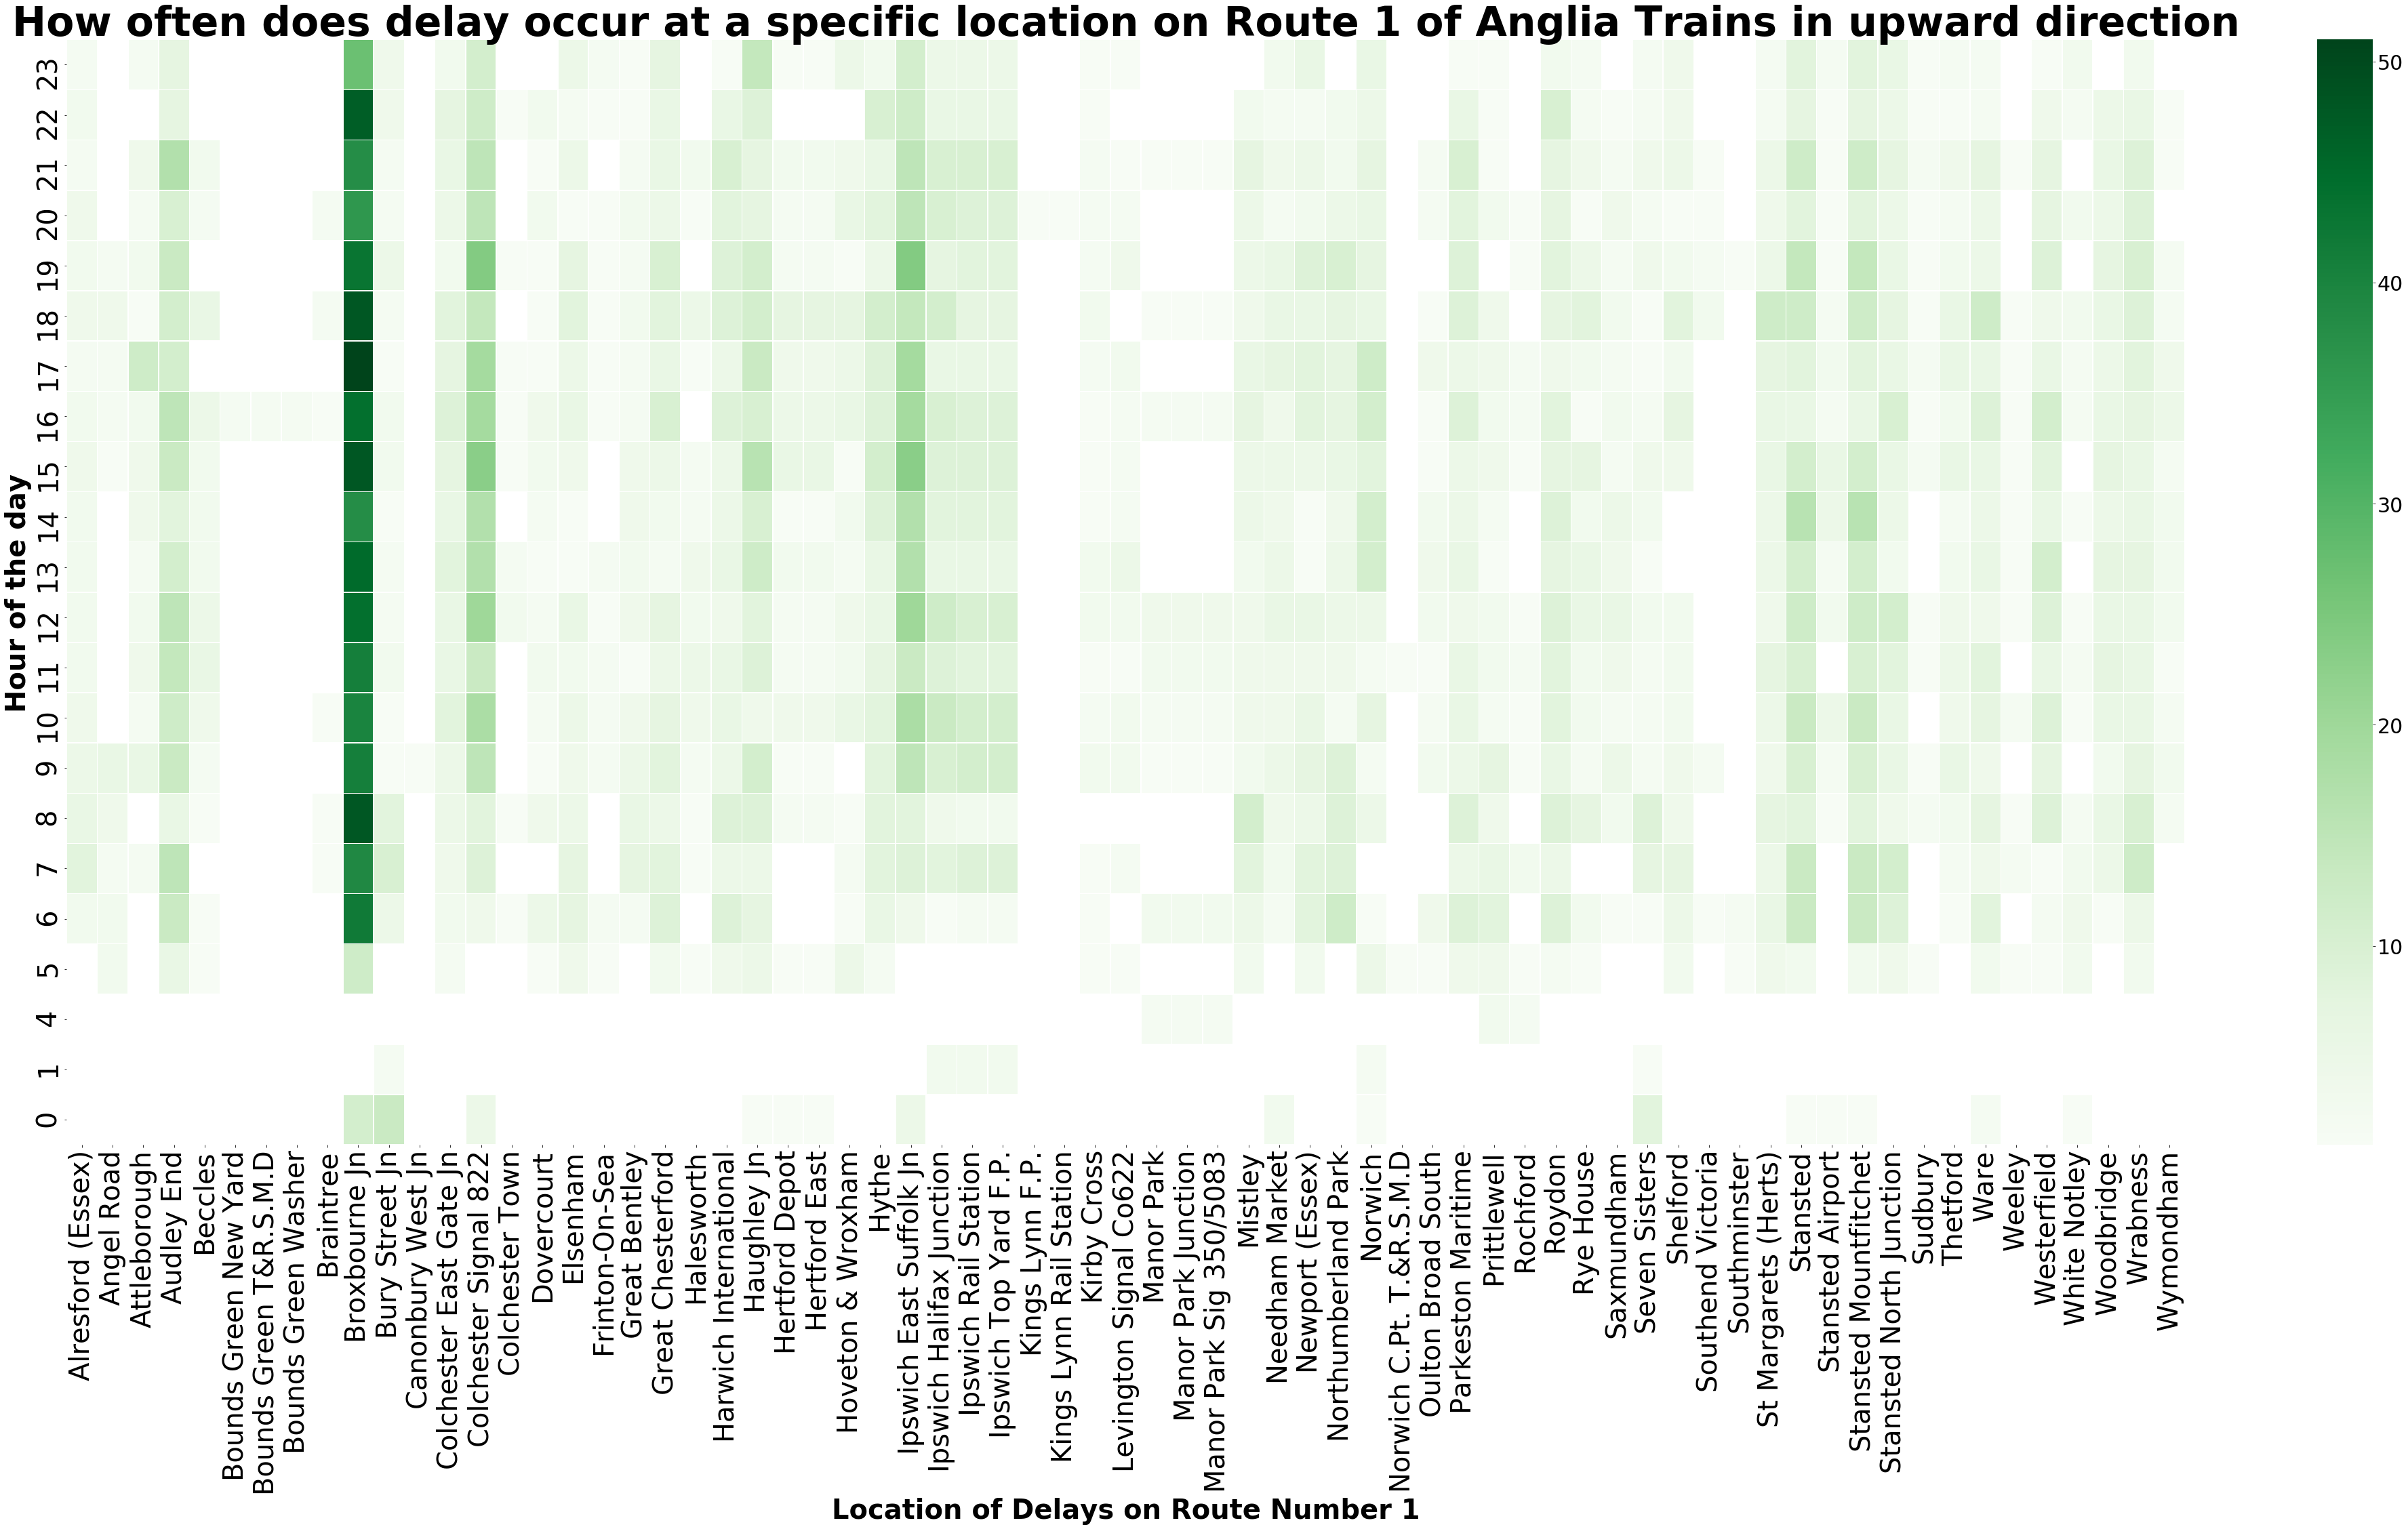

In [451]:
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='Greens', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_xlabel('Location of Delays on Route Number 1', fontsize=40,fontweight="bold")
ax.set_title('How often does delay occur at a specific location on Route 1 of Anglia Trains in upward direction', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
plt.yticks()
plt.gca().invert_yaxis()
plt.show()
fig.tight_layout()
fig.savefig('heatmap_for_delays_locations_upward_direction.png')

In [452]:
df2=df1_with_locs[['NAME','variation_status','actual_ts','actual_date','actual_hour','route','direction_ind']]
df2=df2[df2['route']=='1']
df2=df2[df2['direction_ind']=='DOWN']
df2=df2.sort_values('actual_ts')
df3=df2[df2['variation_status']=='LATE']
df3['NAME']=df3['NAME'].fillna('')
df3=df3[df3['NAME']!='']
df4=df3.groupby(['NAME','actual_hour'])['actual_ts'].count().reset_index()
df4=df4.drop_duplicates()
df_vis = df4.pivot(index='actual_hour', columns='NAME', values='actual_ts')

/Users/akshat.kaushik/anaconda_folder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



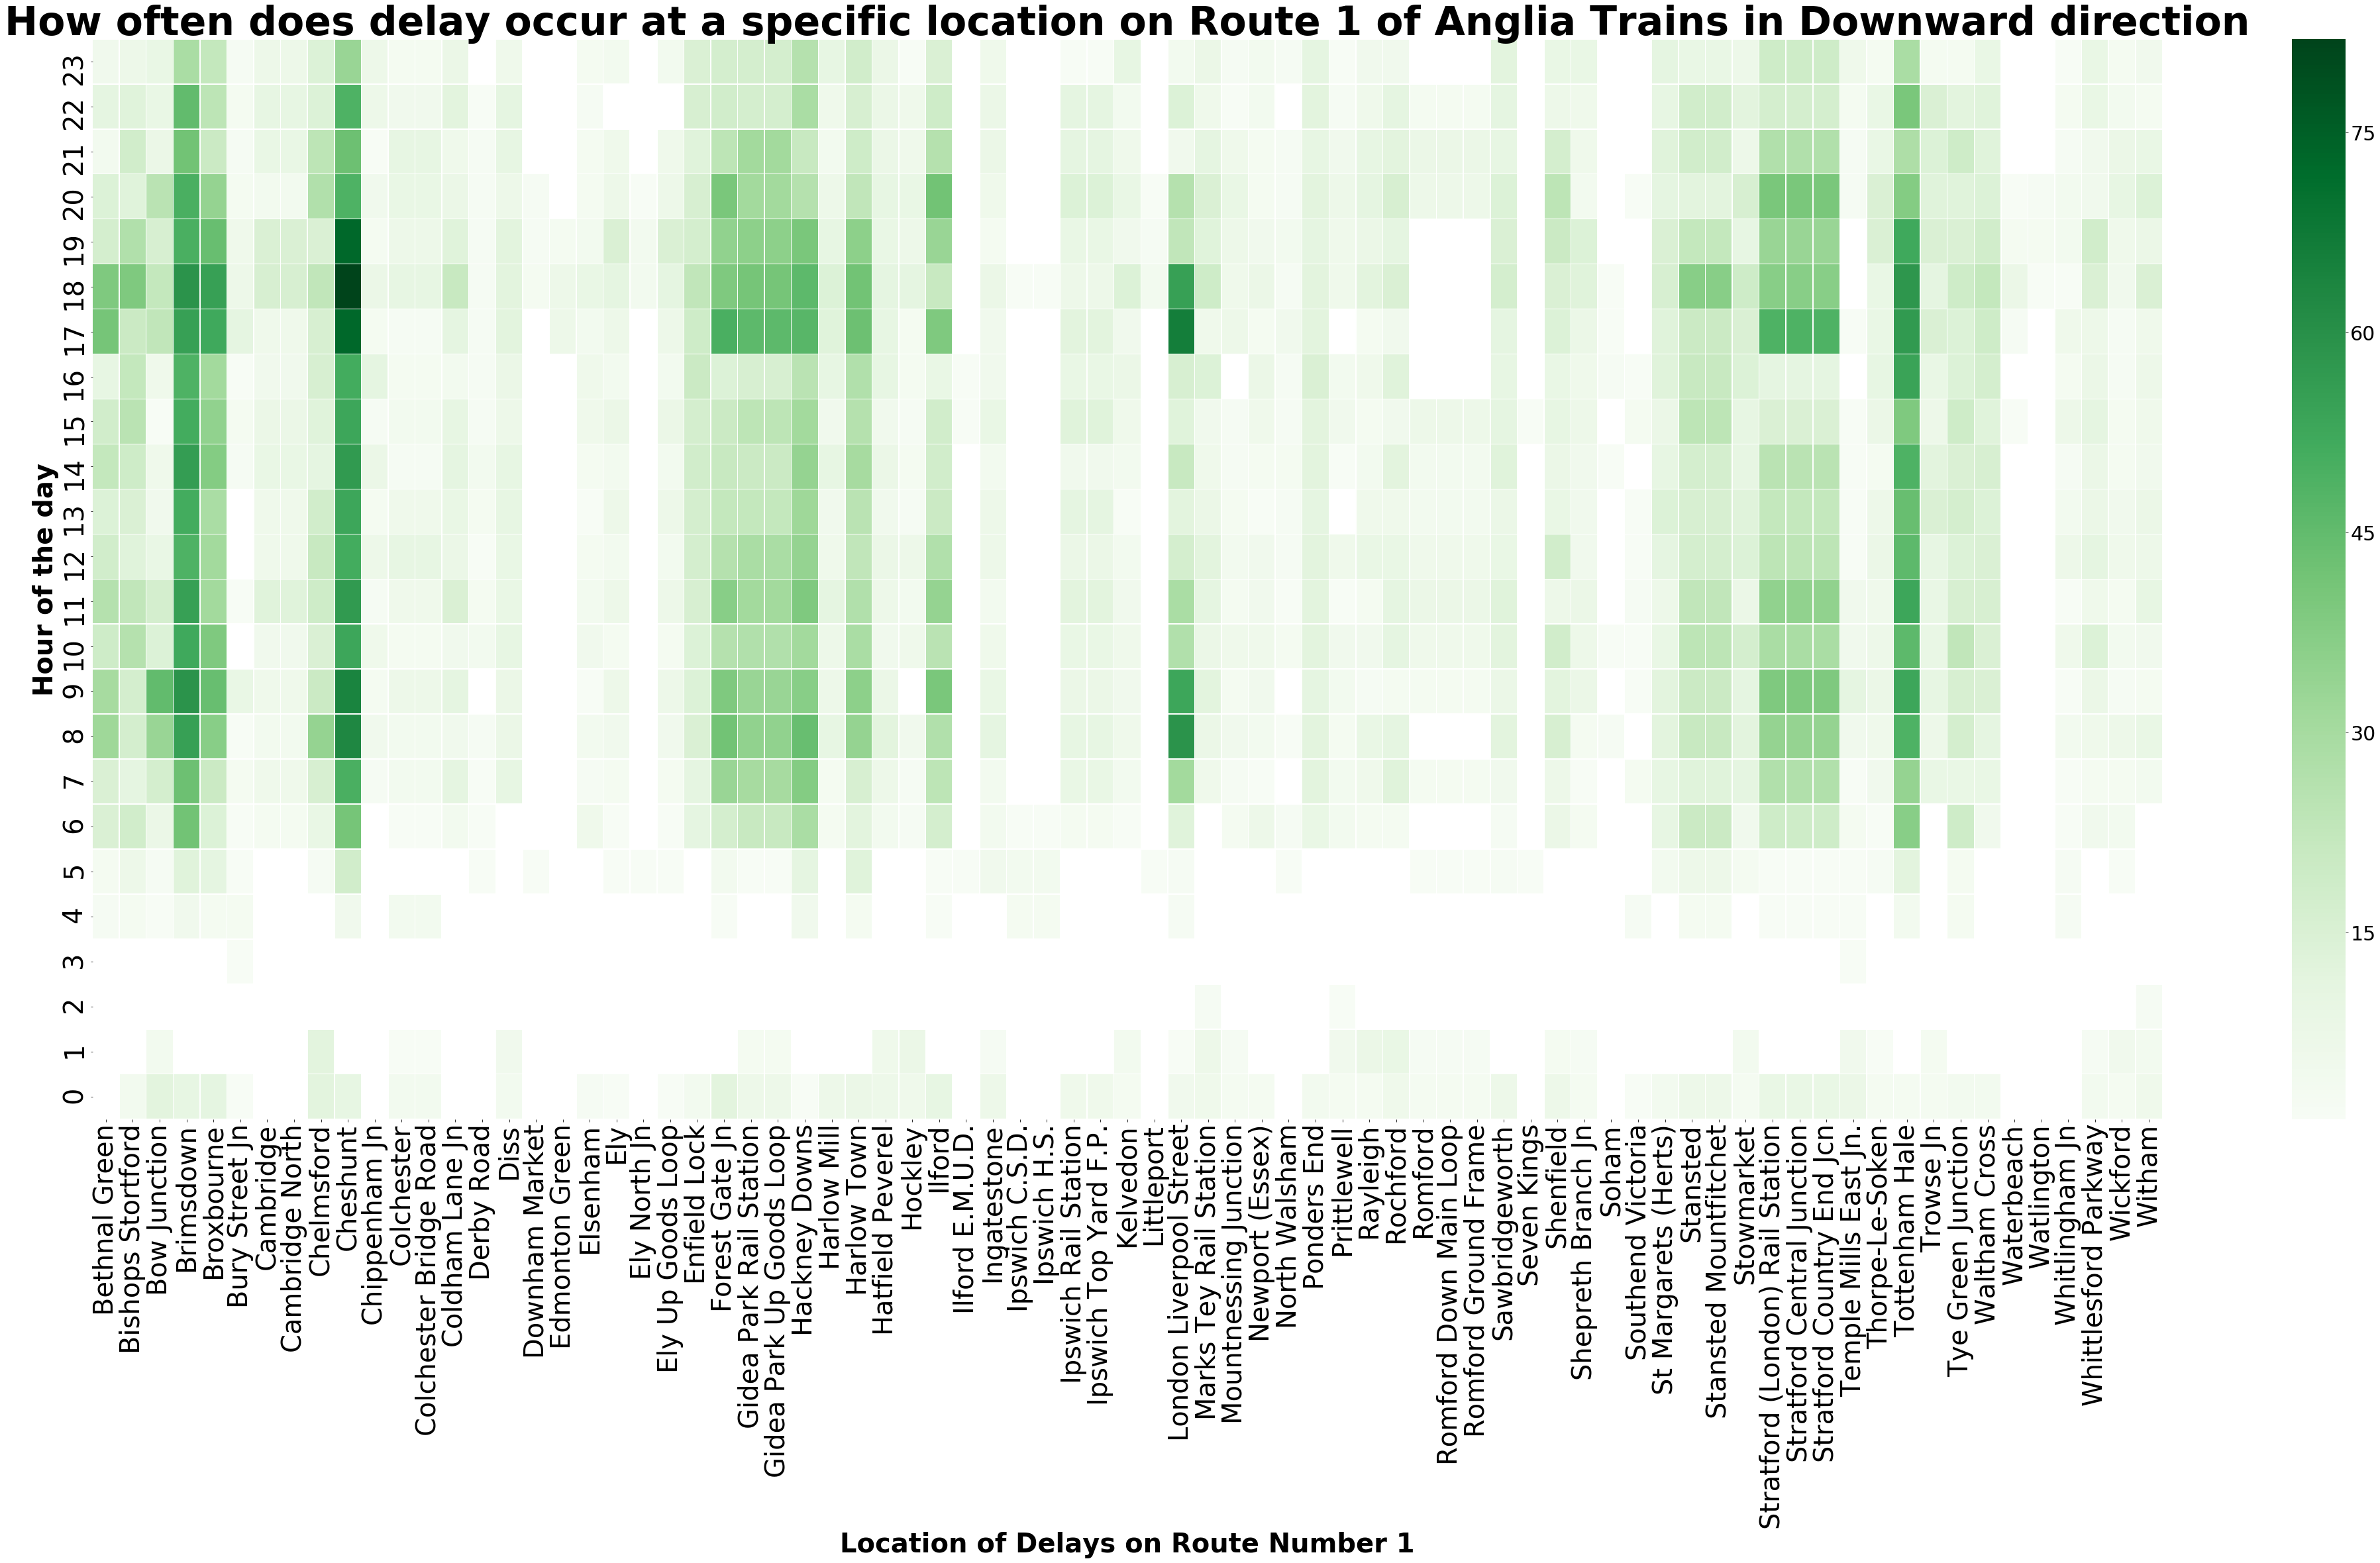

In [453]:
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='Greens', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_xlabel('Location of Delays on Route Number 1', fontsize=40,fontweight="bold")
ax.set_title('How often does delay occur at a specific location on Route 1 of Anglia Trains in Downward direction', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
plt.yticks()
plt.gca().invert_yaxis()
plt.show()
fig.tight_layout()
fig.savefig('heatmap_for_delays_locations_downward_direction.png')

In [454]:
df1_with_locs.columns

Index(['event_type', 'gbtt_timestamp', 'original_loc_stanox',
       'planned_timestamp', 'timetable_variation', 'original_loc_timestamp',
       'current_train_id', 'delay_monitoring_point', 'next_report_run_time',
       'reporting_stanox', 'actual_timestamp', 'correction_ind',
       'event_source', 'train_file_address', 'platform', 'division_code',
       'train_terminated', 'train_id', 'offroute_ind', 'variation_status',
       'train_service_code', 'toc_id', 'loc_stanox', 'auto_expected',
       'direction_ind', 'route', 'planned_event_type', 'next_report_stanox',
       'line_ind', 'NAME', 'EASTING', 'NORTHING', 'TIPLOC', 'STANOX',
       'actual_ts', 'actual_date', 'actual_hour'],
      dtype='object')

In [455]:
df1_with_locs['timetable_variation'].unique()

array(['4', '0', '3', '1', '2', '7', '5', '6', '12', '17', '9', '11', '10',
       '8', '22', '15', '25', '104', '13', '14', '29', '49', '18', '16',
       '23', '31', '21', '20', '32', '33', '55', '48', '30', '41', '59',
       '24', '19', '47', '34', '60', '38', '39', '28', '27', '26', '37',
       '142', '35', '54', '88', '50', '68', '40', '65', '98', '95', '42',
       '58', '57', '143', '51', '89', '44', '43', '76', '100', '36', '227',
       '56', '61', '139', '53', '63', '62', '158', '118', '96', '103',
       '101', '66', '77', '69', '71', '140', '52', '80'], dtype=object)

In [456]:
df2=df1_with_locs[['NAME','variation_status','actual_ts','actual_date','actual_hour','route','direction_ind','timetable_variation']]
df2=df2[df2['route']=='1']
df2=df2[df2['direction_ind']=='UP']
df2=df2[df2['variation_status']=='LATE']
df2=df2.sort_values('actual_ts')
df2['NAME']=df2['NAME'].fillna('')
df2=df2[df2['NAME']!='']
df2.head()

NAME variation_status           actual_ts  \
144371              Prittlewell             LATE 2018-05-24 04:04:00   
93104                  Rochford             LATE 2018-05-24 04:09:00   
87282       Manor Park Junction             LATE 2018-05-24 04:56:00   
87281   Manor Park Sig 350/5083             LATE 2018-05-24 04:56:00   
87280                Manor Park             LATE 2018-05-24 04:56:00   

       actual_date  actual_hour route direction_ind timetable_variation  
144371  2018-05-24            4     1            UP                   2  
93104   2018-05-24            4     1            UP                   1  
87282   2018-05-24            4     1            UP                   2  
87281   2018-05-24            4     1            UP                   2  
87280   2018-05-24            4     1            UP                   2

In [457]:
df2['timetable_variation'].unique()

array(['2', '1', '3', '4', '5', '6', '7', '14', '16', '13', '25', '8',
       '12', '10', '11', '27', '28', '29', '49', '15', '9', '20', '19',
       '18', '17', '227', '42', '40', '158', '23', '88', '38', '31', '22',
       '24', '30', '39', '68', '65', '58', '26'], dtype=object)

In [458]:
df2['timetable_variation']=df2['timetable_variation'].astype(int)

In [459]:
df4=df2.groupby(['NAME','actual_hour'])['timetable_variation'].mean().reset_index()


In [460]:
df4.head()

NAME  actual_hour  timetable_variation
0  Alresford (Essex)            6             1.000000
1  Alresford (Essex)            7             1.125000
2  Alresford (Essex)            8             1.666667
3  Alresford (Essex)            9             1.600000
4  Alresford (Essex)           10             1.500000

In [461]:
df4=df4.drop_duplicates()
df_vis = df4.pivot(index='actual_hour', columns='NAME', values='timetable_variation')

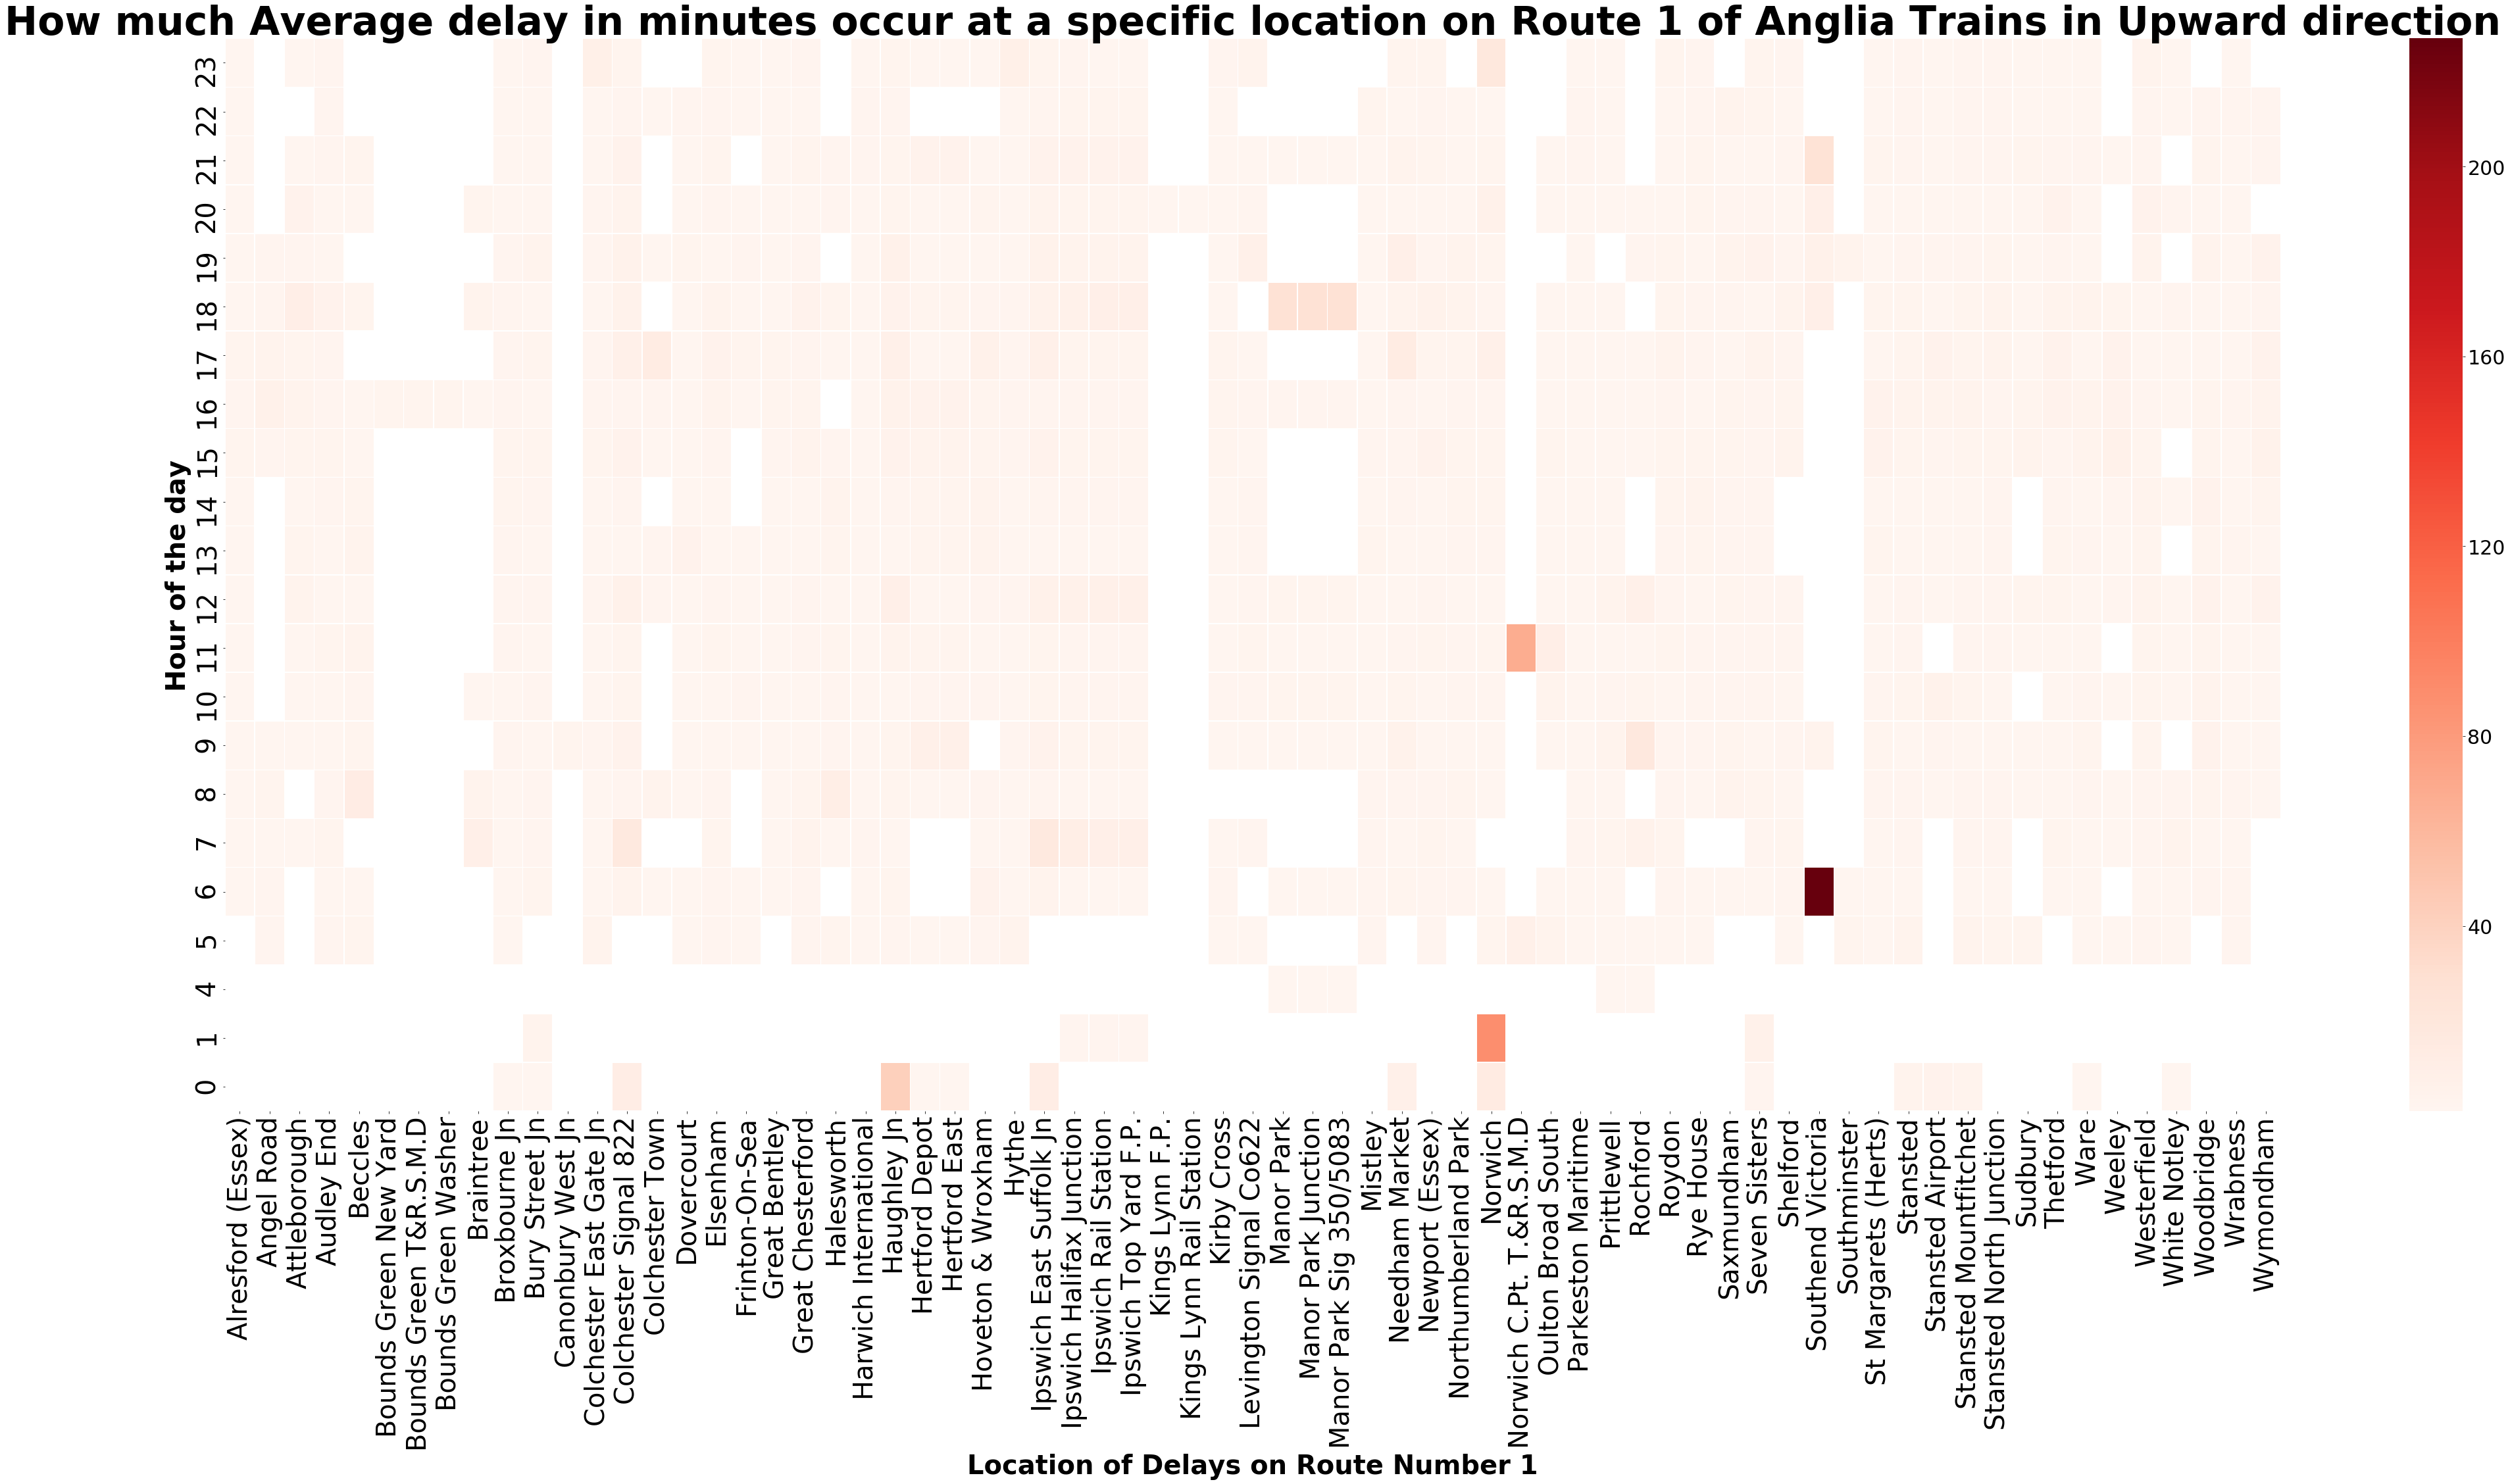

In [462]:
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='Reds', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_xlabel('Location of Delays on Route Number 1', fontsize=40,fontweight="bold")
ax.set_title('How much Average delay in minutes occur at a specific location on Route 1 of Anglia Trains in Upward direction', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
plt.yticks()
plt.gca().invert_yaxis()
plt.show()
fig.tight_layout()
fig.savefig('heatmap_for_total_delays_locations_upward_direction.png')

In [463]:
df2=df1_with_locs[['NAME','variation_status','actual_ts','actual_date','actual_hour','route','direction_ind','timetable_variation']]
df2=df2[df2['route']=='1']
df2=df2[df2['direction_ind']=='DOWN']
df2=df2[df2['variation_status']=='LATE']

df2=df2.sort_values('actual_ts')

df2['NAME']=df2['NAME'].fillna('')
df2=df2[df2['NAME']!='']
df2['timetable_variation']=df2['timetable_variation'].astype(int)
df4=df2.groupby(['NAME','actual_hour'])['timetable_variation'].mean().reset_index()
df4=df4.drop_duplicates()
df_vis = df4.pivot(index='actual_hour', columns='NAME', values='timetable_variation')


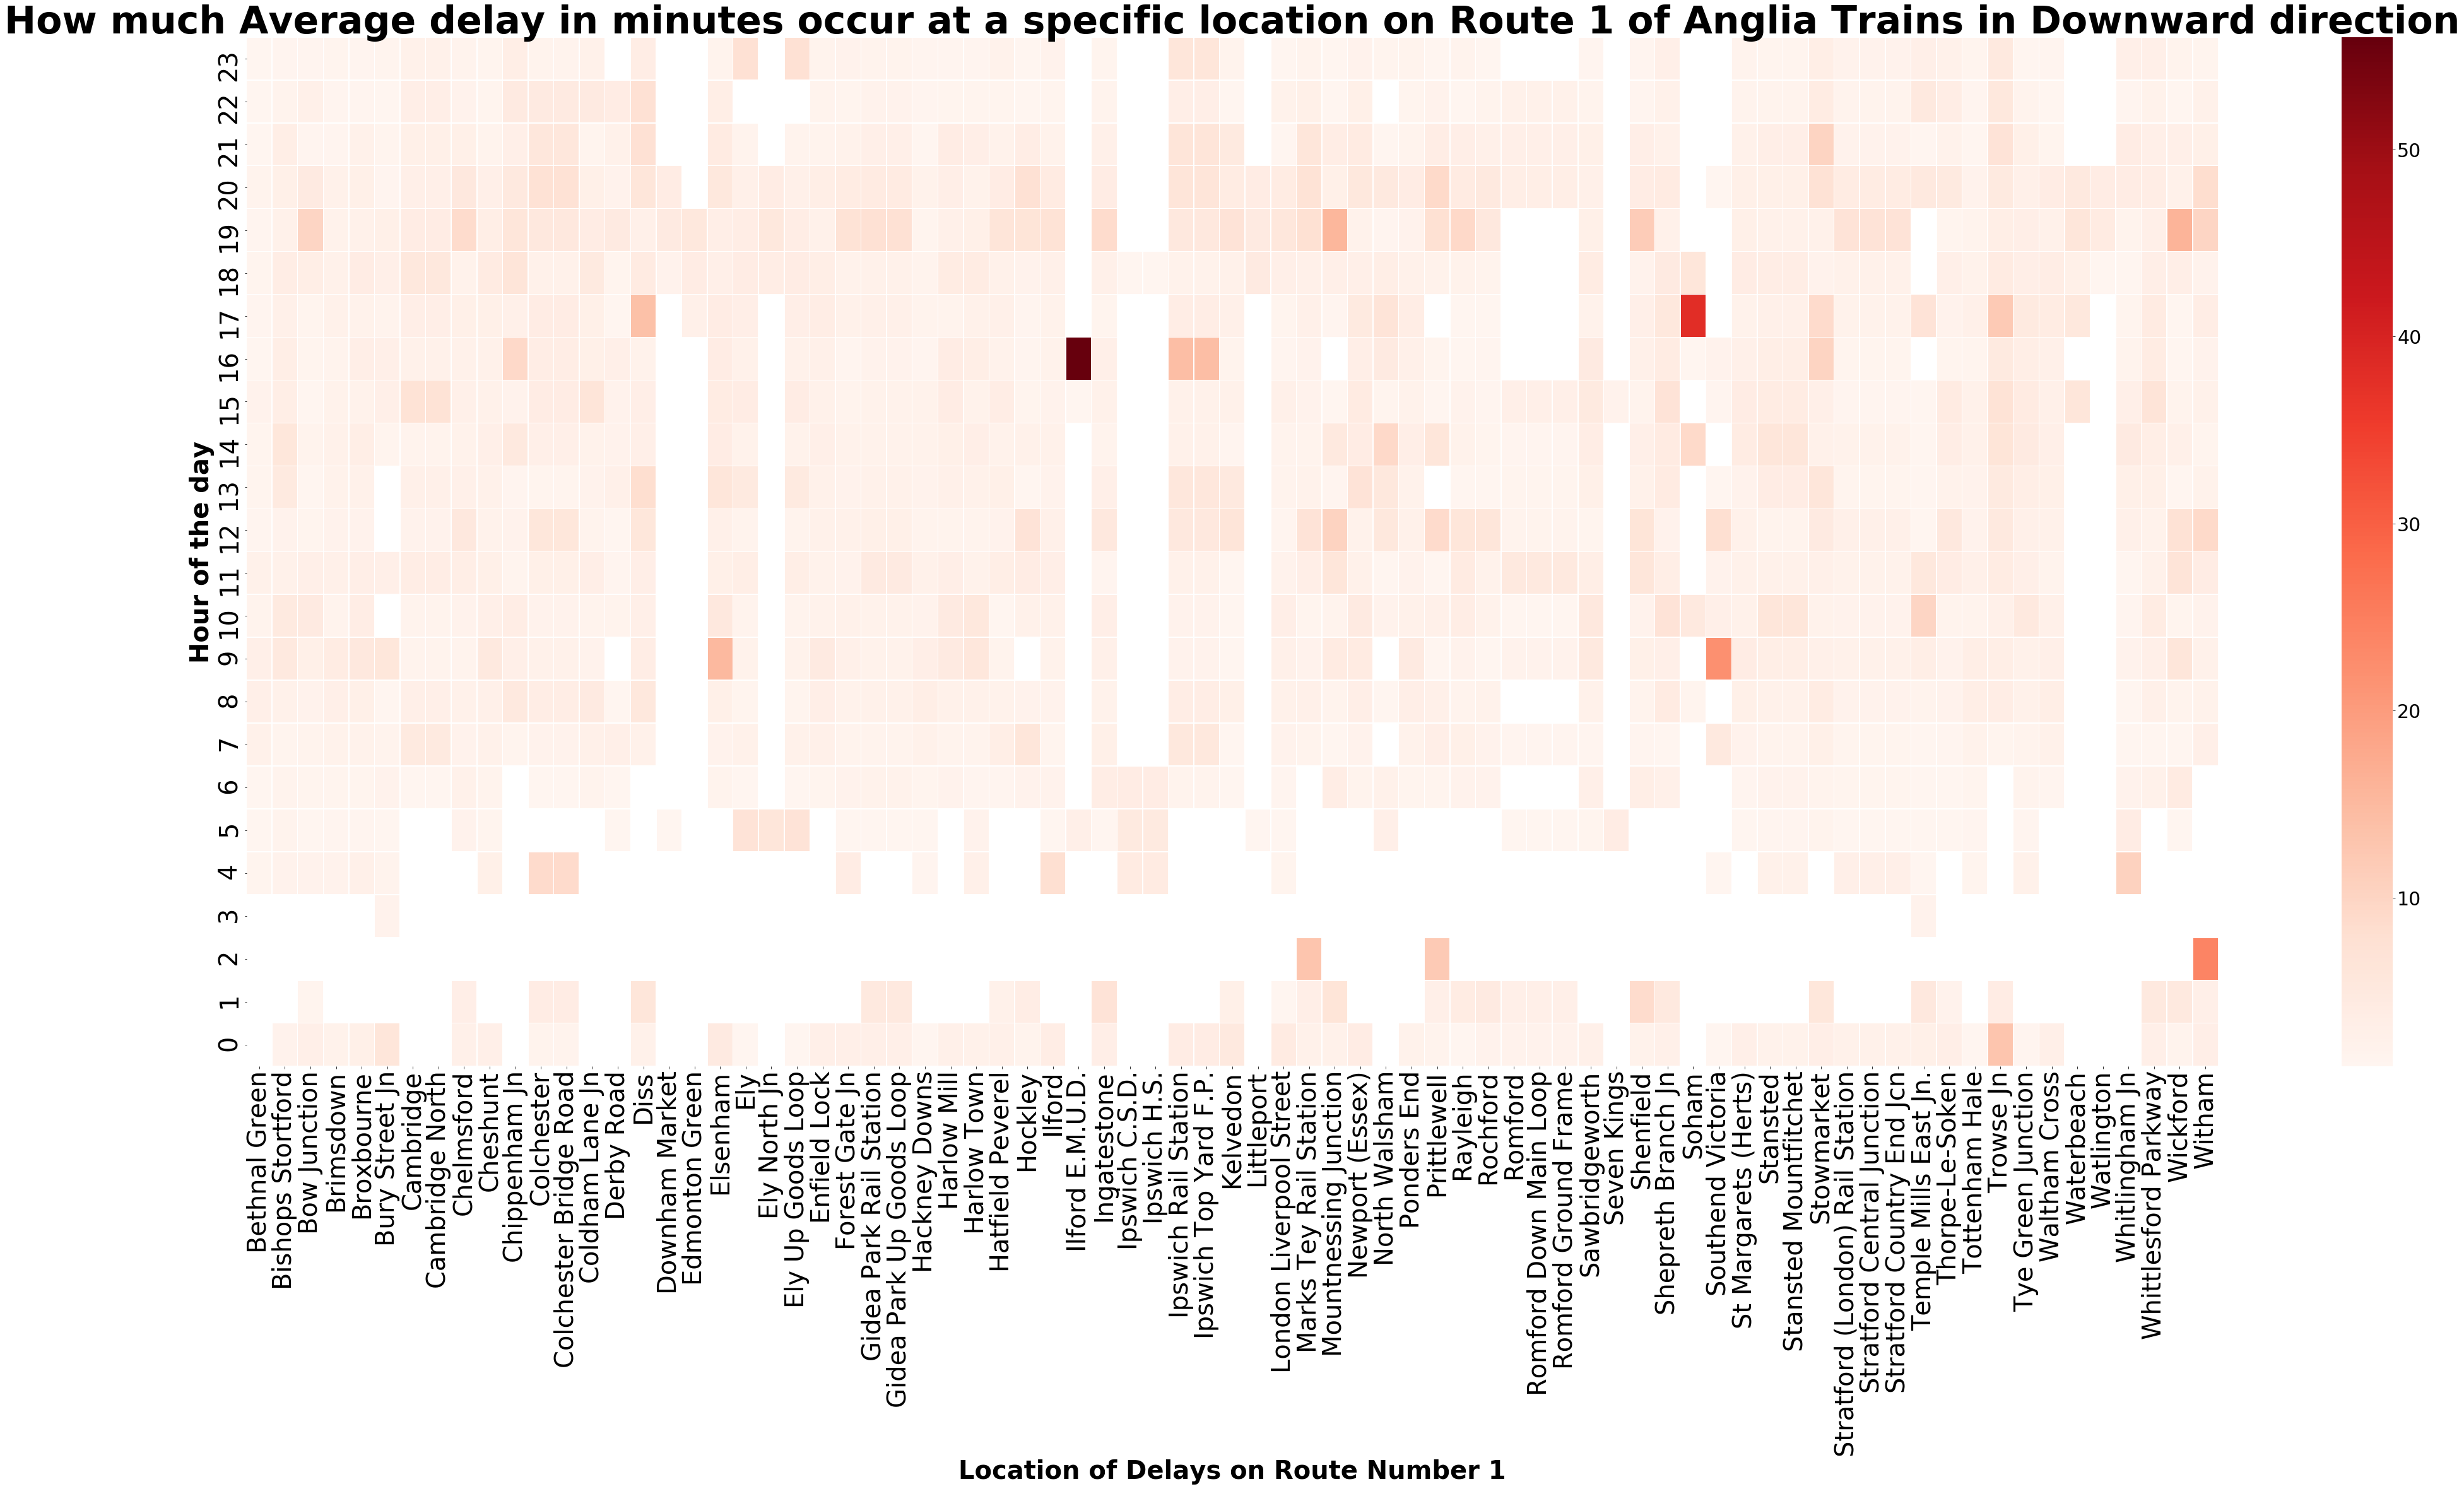

In [464]:
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='Reds', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_xlabel('Location of Delays on Route Number 1', fontsize=40,fontweight="bold")
ax.set_title('How much Average delay in minutes occur at a specific location on Route 1 of Anglia Trains in Downward direction', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
plt.yticks()
plt.gca().invert_yaxis()
plt.show()
fig.tight_layout()
fig.savefig('heatmap_for_total_delays_locations_downward_direction.png')

In [543]:
df2=df1_with_locs[['NAME','variation_status','actual_ts','actual_date','actual_hour','route','direction_ind','timetable_variation']]
df2=df2[df2['route']=='1']
df2=df2[df2['direction_ind']=='UP']
df2=df2[df2['variation_status']=='LATE']
df2=df2.sort_values('actual_ts')
df2['NAME']=df2['NAME'].fillna('')
df2=df2[df2['NAME']!='']
df2['timetable_variation']=df2['timetable_variation'].astype(int)
df2['day_of_the_week']=df2['actual_ts'].dt.weekday_name
df2['day_of_the_week_num']=df2['actual_ts'].dt.dayofweek
df2=df2[df2['route']!='']
df2=df2[['day_of_the_week','actual_hour','timetable_variation','day_of_the_week_num']].drop_duplicates()
df4=df2.groupby(['day_of_the_week','day_of_the_week_num','actual_hour'])['timetable_variation'].mean().reset_index()
df4=df4.drop_duplicates()
df4=df4.sort_values(['day_of_the_week_num'])
df_vis=df4.pivot(index='actual_hour', columns='day_of_the_week_num', values='timetable_variation')


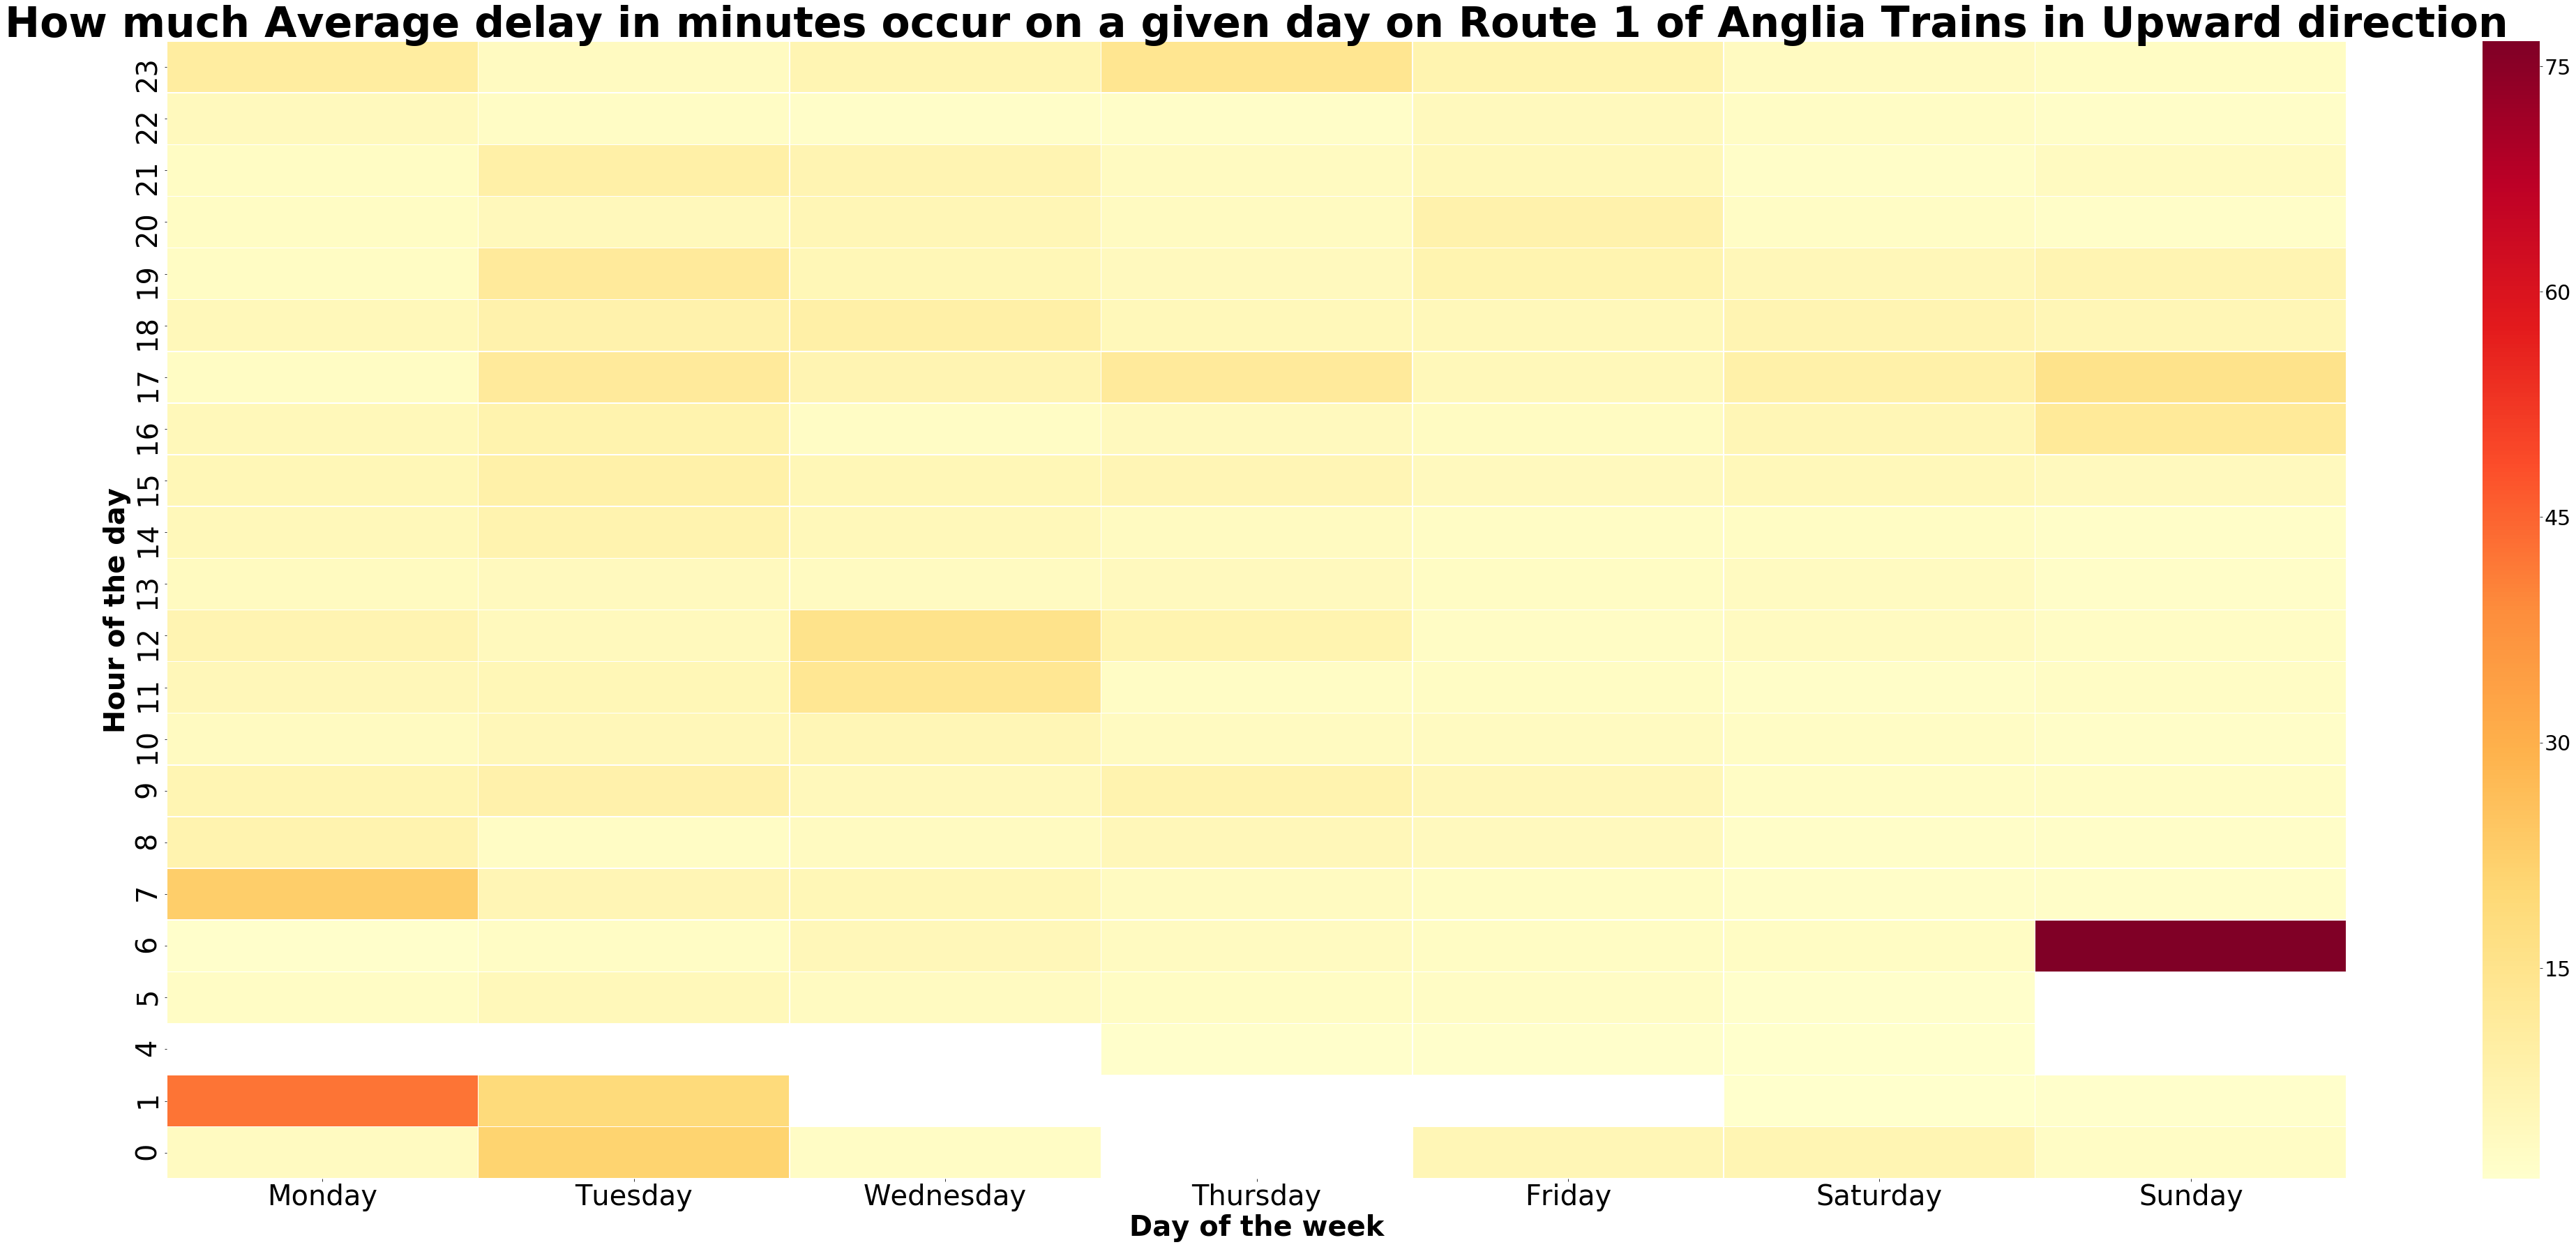

In [544]:
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='YlOrRd', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_xlabel('Day of the week', fontsize=40,fontweight="bold")
ax.set_title('How much Average delay in minutes occur on a given day on Route 1 of Anglia Trains in Upward direction', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.yticks()
plt.gca().invert_yaxis()
plt.show()
fig.tight_layout()
fig.savefig('heatmap_for_total_delays_dayofthe week_upward_direction.png')

In [545]:
df2=df1_with_locs[['NAME','variation_status','actual_ts','actual_date','actual_hour','route','direction_ind','timetable_variation']]
df2=df2[df2['route']=='1']
df2=df2[df2['direction_ind']=='DOWN']
df2=df2[df2['variation_status']=='LATE']
df2=df2.sort_values('actual_ts')
df2['NAME']=df2['NAME'].fillna('')
df2=df2[df2['NAME']!='']
df2['timetable_variation']=df2['timetable_variation'].astype(int)
df2['day_of_the_week']=df2['actual_ts'].dt.weekday_name
df2['day_of_the_week_num']=df2['actual_ts'].dt.dayofweek
df2=df2[df2['route']!='']
df2=df2[['day_of_the_week','actual_hour','timetable_variation','day_of_the_week_num']].drop_duplicates()
df4=df2.groupby(['day_of_the_week','day_of_the_week_num','actual_hour'])['timetable_variation'].mean().reset_index()
df4=df4.drop_duplicates()
df4=df4.sort_values(['day_of_the_week_num'])
df_vis=df4.pivot(index='actual_hour', columns='day_of_the_week_num', values='timetable_variation')


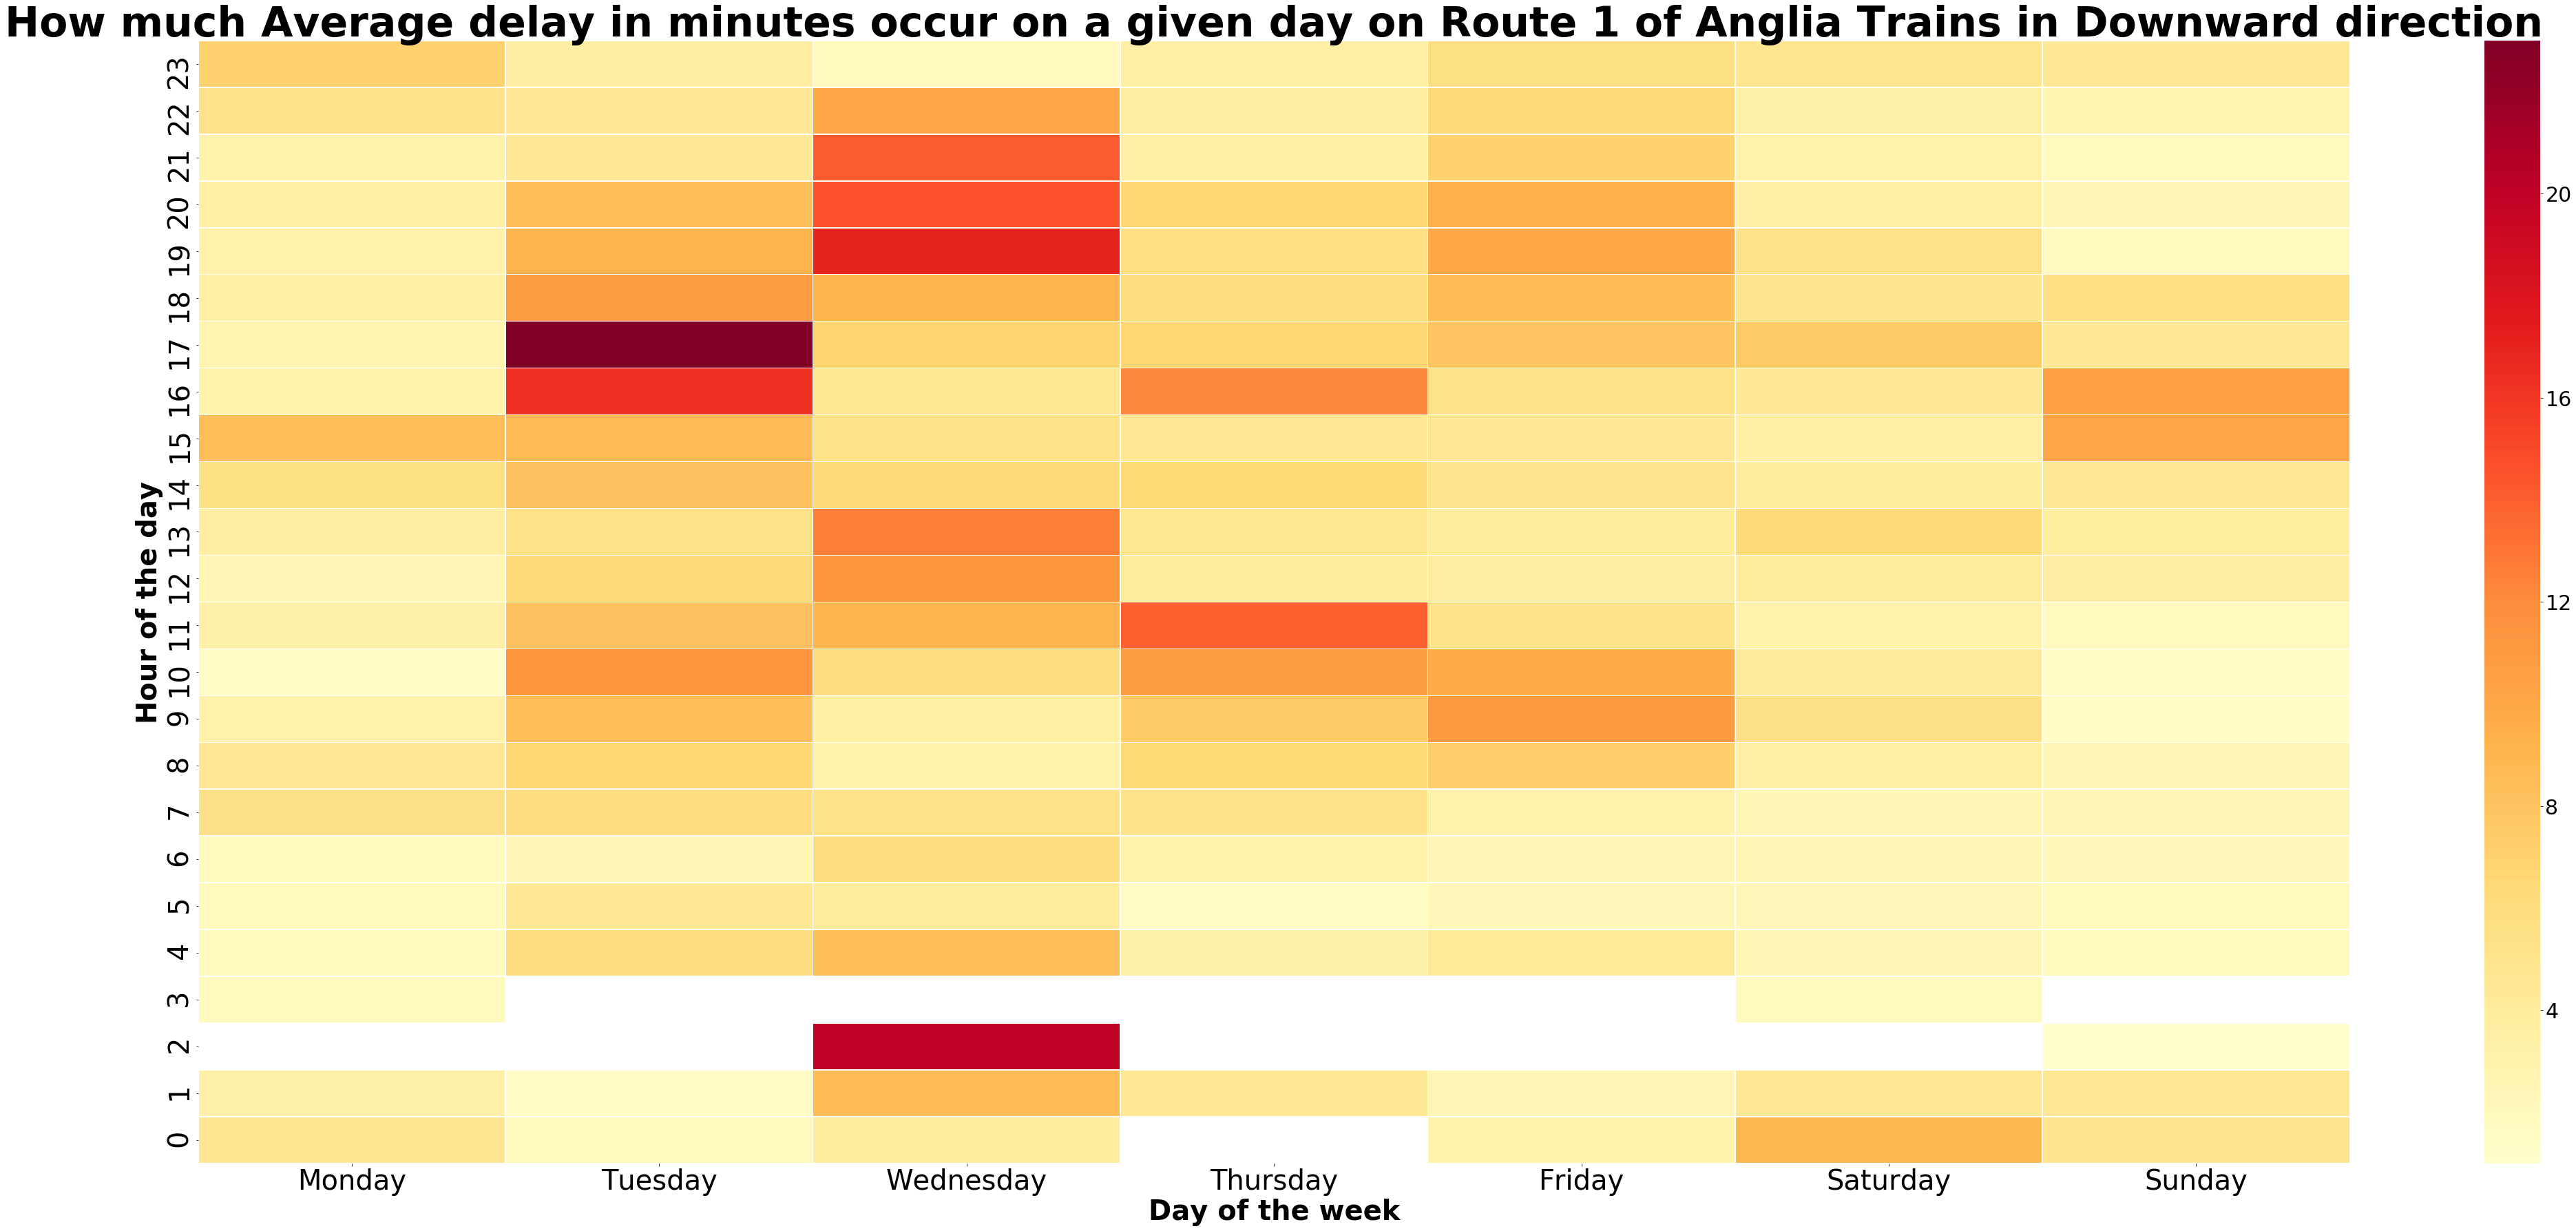

In [546]:
fig, ax = plt.subplots(figsize=(70,30))
sns.heatmap(df_vis, fmt="g", cmap='YlOrRd', linewidths=.5,annot=False,ax=ax,annot_kws={"size": 30})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=30)
ax.set_ylabel('Hour of the day', fontsize=40,fontweight="bold")
ax.set_xlabel('Day of the week', fontsize=40,fontweight="bold")
ax.set_title('How much Average delay in minutes occur on a given day on Route 1 of Anglia Trains in Downward direction', fontsize=60,fontweight="bold")
ax.tick_params(labelsize=40)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.yticks()
plt.gca().invert_yaxis()
plt.show()
fig.tight_layout()
fig.savefig('heatmap_for_total_delays_dayofthe week_downward_direction.png')